# Déclaration variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

pd.set_option('display.max_columns', None)

source = r"F:\09 - Data Analyst\02 - Projets\07 - Projet 7\01 - Données source"

save = r"F:\09 - Data Analyst\02 - Projets\07 - Projet 7\02 - viz_prez"
#data
data = pd.read_csv(source + r"\data-projet7.csv", sep=",", decimal = ",")

# indices de gini AVEC NaN
data_gini = pd.read_csv(source + r"\data-projet7-gini.csv", skiprows = 4, decimal = ".", sep=",")
data_gini["Indicator Name"] = "Gini"

# indices de gini SANS NaN
data_gini_snan = pd.read_csv(source + r"\data-projet7-gini.csv", skiprows = 4, decimal = ".", sep=",", keep_default_na=True)
data_gini_snan["Indicator Name"] = "Gini"

# populations mondiales
data_pop_monde = pd.read_csv(source + r"\data-projet7-pop_monde.csv",skiprows = 4, sep = ",")
data_pop_monde["Indicator Name"] = "pop_monde"

# gdp en $PPP par pays
data_gdpppp_pays = pd.read_csv(source + r"\data-projet7-gdp_ppp.csv",skiprows = 4, sep = ",")
data_gdpppp_pays["Indicator Name"] = "gdp_ppp"

# gdp_per_capita en $PPP par pays
data_gdpppp_pays_capita = pd.read_csv(source + r"\data-projet7-gdpppp.csv",skiprows = 4, sep = ",")
data_gdpppp_pays_capita["Indicator Name"] = "gdp_ppp_capita"

# classification par income et géographie des pays
table_pays = pd.read_csv(source + r"\data-projet7-table-pays.csv", sep=",")

<font style='font-family:"Times New Roman"'>

<BR><center><font size = 8, color = "black">Sommaire</font></center>
<br>

<div style="float:left;width:50%;">
    <a href='#M1'><font size = 5, color = "#1F77B4" > Mission 1 : Descriptif rapide des données</font></a>
    <br>
    <br>
    <li><a href='#M1P1'><font size = 4, color = "#7BC8F6">Info</font></a></li>
    <li><a href='#M1P2'><font size = 4, color = "#7BC8F6">Describe</font></a></li>
    <li><a href='#M1P3'><font size = 4, color = "#7BC8F6">Year_survey</font></a></li>
    <li><a href='#M1P4'><font size = 4, color = "#7BC8F6">Quantile</font></a></li>
    <li><a href='#M1P5'><font size = 4, color = "#7BC8F6">Income</font></a></li>
    <li><a href='#M1P6'><font size = 4, color = "#7BC8F6">Gdpppp</font></a></li>
    <li><a href='#M1P7'><font size = 4, color = "#7BC8F6">Population mondiale et échantillon</font></a></li>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <a href='#M3'><font size = 5, color = "#2ca02c" > Mission 3 : Classifications des revenus</font></a>
    <br>
    <br>
    <li><a href='#M3P1'><font size = 4, color = "#64C878">Génération $Y_{parents}$</font></a></li>
    <li><a href='#M3P2'><font size = 4, color = "#64C878">Génération $\epsilon$</font></a></li>
    <li><a href='#M3P3'><font size = 4, color = "#64C878">Calcul $Y_{child}$ avec p=0.9</font></a></li>
    <li><a href='#M3P4'><font size = 4, color = "#64C878">Calcul $c_{i,child}$ et $c_{i,parents}$</font></a></li>
    <li><a href='#M3P5'><font size = 4, color = "#64C878">Calcul des probabilités conditionnelles</font></a></li>
    <li><a href='#M3P6'><font size = 4, color = "#64C878">Graphiques distributions conditionnelles</font></a></li>
    <li><a href='#M3P7'><font size = 4, color = "#64C878">Effacement individus</font></a></li>
    <li><a href='#M3P8'><font size = 4, color = "#64C878">Réplication des 500 clones</font></a></li>
    <li><a href='#M3P9'><font size = 4, color = "#64C878">Calcul des $c_{i,parents}$ sur le df data_new</font></a></li>
    <li><a href='#M3P10'><font size = 4, color = "#64C878">Présence des $m_j$ et$G_j$</font></a></li>    
    <br>
    <br>
    <br>
    <br>
    <br>
</div>

<div style="float:left;width:50%;">
    <a href='#M2'><font size = 5, color = "#ff7f0e" > Mission 2 : Clustering et profils de revenus </font></a>
    <br>
    <br>
    <li><a href='#M2P1'><font size = 4, color = "#FFA500">Revenus Moyens</font></a></li>
    <li><a href='#M2P2'><font size = 4, color = "#FFA500">Indices de Gini</font></a></li>
    <li><a href='#M2P3'><font size = 4, color = "#FFA500">Classifications géo-économiques</font></a></li>
    <li><a href='#M2P4'><font size = 4, color = "#FFA500">Classification Hiérarchique Ascendante</font></a></li>
    <li><a href='#M2P5'><font size = 4, color = "#FFA500">Sélection de pays</font></a></li>
    <li><a href='#M2P6'><font size = 4, color = "#FFA500">Limites de la CAH</font></a></li>
    <li><a href='#M2P7'><font size = 4, color = "#FFA500">K-means</font></a></li>
    <li><a href='#M2P8'><font size = 4, color = "#FFA500">Propositions de Gini max et min</font></a></li>
    <li><a href='#M2P9'><font size = 4, color = "#FFA500">Sélection finale</font></a></li>
    <li><a href='#M2P10'><font size = 4, color = "#FFA500">Sélection finale - Lorenz et Ginis</font></a></li>
    <li><a href='#M2P11'><font size = 4, color = "#FFA500">Classements des Ginis globaux</font></a></li>
    <br>
    <br>
    <br>
    <br>
    <a href='#M4'><font size = 5, color = "#d62728" > Mission 4 : Tests statistiques </font></a>
    <br>
    <br>
    <li><a href='#M4P1'><font size = 4, color = "#E36A6A">ANOVA</font></a></li>
    <li><a href='#M4P2'><font size = 4, color = "#E36A6A">données log</font></a></li>
    <li><a href='#M4P3'><font size = 4, color = "#E36A6A">données non-log</font></a></li>
    <li><a href='#M4P4'><font size = 4, color = "#E36A6A">Régression linéaire 1</font></a></li>
    <li><a href='#M4P5'><font size = 4, color = "#E36A6A">données non-log</font></a></li>
    <li><a href='#M4P6'><font size = 4, color = "#E36A6A">données nlog</font></a></li>
    <li><a href='#M4P7'><font size = 4, color = "#E36A6A">Régression linéaire 2</font></a></li> 
    <li><a href='#M4P8'><font size = 4, color = "#E36A6A">données non-log</font></a></li>
    <li><a href='#M4P9'><font size = 4, color = "#E36A6A">données log</font></a></li>
</div>

<div style="float:left;width:50%;">

</div>

    
    </font>

<a id='M1'></a>
# Mission 01
- nettoyage du dataset colonne par colonne
- description du dataset

<a id='M1P1'></a>
## Info

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


<font style='font-family:"Times New Roman"' size = 4>Mon dataframe comporte six colonnes. Une qualitative (nom des pays) et cinq quantitatives. Le seul Dtype problématique se trouve en object. Je la change immédiatement. </font>



In [3]:
data.country = [str(x) for x in data.country]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


<a id='M1P2'></a>
## describe

In [5]:
data.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
mean,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,2008.000000,75.500000,100.0,7515.420900,1.877300e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


Nous avons ici une moyenne globale des revenus de 6 069.22 PPP. <br>
Il semblerait qu'il y ait un problème de GDP PPP. Le max de la colonne est de 4 300 332. Un pays a donc un GDP/hbt en PPP de + de 4m. Cela semble impossible. Nous allons voir ce point plus bas dans la section <a href='#gdpppp'>gdpppp</a>.

<a id='M1P3'></a>
## year_survey

In [6]:
# Nombre de pays par années
data.groupby(["year_survey"]).nunique().country

year_survey
2004     1
2006     5
2007    15
2008    76
2009    12
2010     6
2011     1
Name: country, dtype: int64

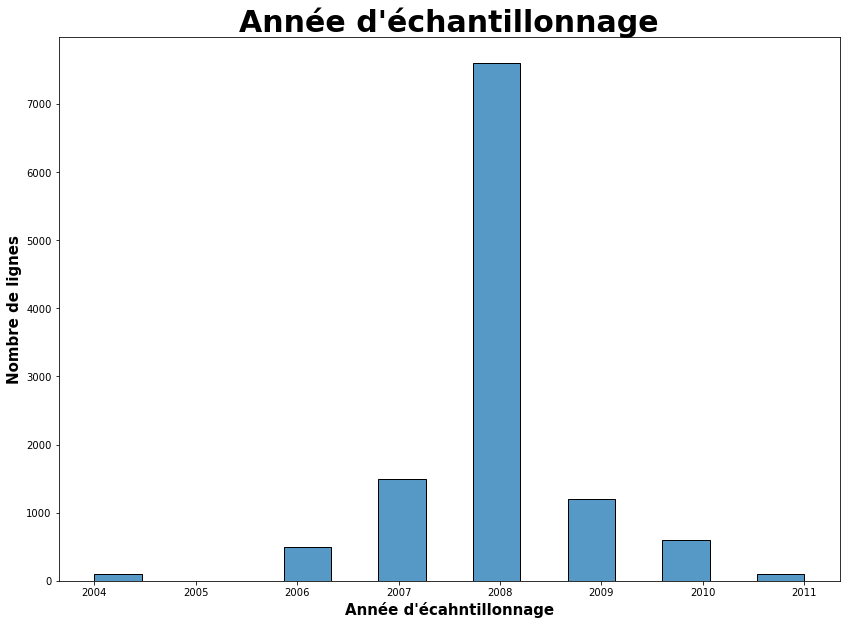

In [7]:
plt.figure(figsize = (14,10))

sns.histplot(data = data, x = "year_survey")
plt.xticks(ha = "center")
plt.xlabel("Année d'écahntillonnage", fontweight = "bold", fontsize = 15)
plt.ylabel("Nombre de lignes", fontweight = "bold", fontsize = 15)
plt.title("Année d'échantillonnage", fontweight = "bold", fontsize = 30)

plt.savefig(save + r"\01_histo_années.png")

plt.show()

La majorité de mes dates d'échantillonnage sont en 2008, puis en 2007, 2009, 2010, 2006, 2011 et 2004.<br>
La distribution a une allure normale avec une moyenne de 2007.98.

<a id='M1P4'></a>
## quantile
Je vérifie mon champs valeur quantile.

In [8]:
# nombre de pays
len(data.groupby('country').mean())

116

In [9]:
# nombre de lignes
len(data)

11599

Avec 116 pays à 100 centiles, je m'attends à avoir 11 600 lignes. Or, je n'en ai que 11 599. Il y a donc une ligne manquante. Laquelle ?<br>
Si je groupby mon df par quantiles en .count(), je devrais obtenir 116 à chacun sur les pays. En filtrant sur les quantiles dont les comptes ne sont pas à 116, j'obtiendrai les distorsions (manquants ou doublons).

In [10]:
data.groupby('quantile').count()[data.groupby('quantile').count()["country"] != 116]

,country,year_survey,nb_quantiles,income,gdpppp
quantile,,,,,
41,115,115,115,115,113


__Problème de centile__ : le 41ème centile d'un de mes pays est manquant. __De quel pays s'agit-il ?__<br>
Si je .groupby() mon df par pays en sommant, je devrais obtenir pour 10 000 en __nb_quantiles__ pour chaque pays. Je regarde auquel je n'ai pas 10 000.

In [11]:
data.groupby('country').sum()[data.groupby('country').sum()['nb_quantiles'] != 10000]

,year_survey,quantile,nb_quantiles,income,gdpppp
country,,,,,
LTU,198792,5009,9900,657483.5158,1739529.0


Le 41ème centile lithuanien est manquant.<br>
J'ai l'intention de rajouter une ligne avec le même nombre de gdpppp, mais en y insérant un income égal à la moyenne arithmétique entre le centile 40 et 42.

In [12]:
q41 = data[data.country == "LTU"][data[data.country == "LTU"]["quantile"].isin(['40', '41', '42'])].mean()
q41

year_survey      2008.00000
quantile           41.00000
nb_quantiles      100.00000
income           4882.14065
gdpppp          17571.00000
dtype: float64

In [13]:
data = data.append(pd.DataFrame([[data[(data.country == "LTU") & (data["quantile"] == 42)].iloc[0,0], int(q41[0]), int(q41[1]), int(q41[2]), float(q41[3]), float(q41[4])]],
                                columns = data.columns),
                   ignore_index = True).sort_values(["country", "quantile"])

del q41
data = data.reset_index(drop = True)
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0
...,...,...,...,...,...,...
11595,ZAF,2008,96,100,24553.56800,9602.0
11596,ZAF,2008,97,100,28858.03100,9602.0
11597,ZAF,2008,98,100,35750.29000,9602.0
11598,ZAF,2008,99,100,46297.31600,9602.0


In [14]:
data[(data.country == "LTU")]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6200,LTU,2008,1,100,566.3453,17571.0
6201,LTU,2008,2,100,1147.0587,17571.0
6202,LTU,2008,3,100,1490.8408,17571.0
6203,LTU,2008,4,100,1746.5715,17571.0
6204,LTU,2008,5,100,1842.9542,17571.0
...,...,...,...,...,...,...
6295,LTU,2008,96,100,14597.0360,17571.0
6296,LTU,2008,97,100,15659.0080,17571.0
6297,LTU,2008,98,100,17883.8770,17571.0
6298,LTU,2008,99,100,22551.1700,17571.0


Le 41ème centile a été rajouté, le pays LTU dispose de 100 lignes dans la nouvelle BDD.

In [15]:
data[(data.country == "LTU") & (data["quantile"].isin(['40', '41', '42']))]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6239,LTU,2008,40,100,4868.45070,17571.0
6240,LTU,2008,41,100,4882.14065,17571.0
6241,LTU,2008,42,100,4895.83060,17571.0


<a id='M1P5'></a>
## income
__Définition ppp__<br>
Parité de Pouvoir d'achat (Purchasing Power Parity): méthode utilisée en économie pour établir une comparaison entre pays du pouvoir d'achat selon les devises nationales. Une simple utilisation des taux de change ne permet pas de  lefaire. Dans notre étude, la parité de pouvoir d'achat permet de rendre compte, à niveaux de revenus et devises différents de prendre en compte l'intensité du coût de la vie selon les pays. A titre d'exemple, un salaire de 40k€ annuels à Paris permet d'avoir une qualité de vie équivalente à un salaire de 30k€ annuels à Rome. (source non fiable, exemple illustratif)

Méthode EKS : A multilateral method developed by O. Elteto, P. Koves and B. Szulc [Schultz] that computes the nth root of the product of all possible Fisher indexes between n countries. It has been used at the detailed heading level to obtain heading parities, and also at the GDP level. EKS has the properties of base-country invariance and transitivity. (https://stats.oecd.org/glossary/detail.asp?ID=5525).<br>
<br>

In [16]:
data.income.describe()

count     11600.000000
mean       6069.121925
std        9413.786596
min          16.719418
25%         900.768508
50%        2403.492950
75%        7515.313700
max      176928.550000
Name: income, dtype: float64

In [17]:
data[(data.income.isna()) | (data.income.isnull() ) ]

,country,year_survey,quantile,nb_quantiles,income,gdpppp


Il n'y a pas de valeurs NaN, nulles ou aberrantes dans la colonne income

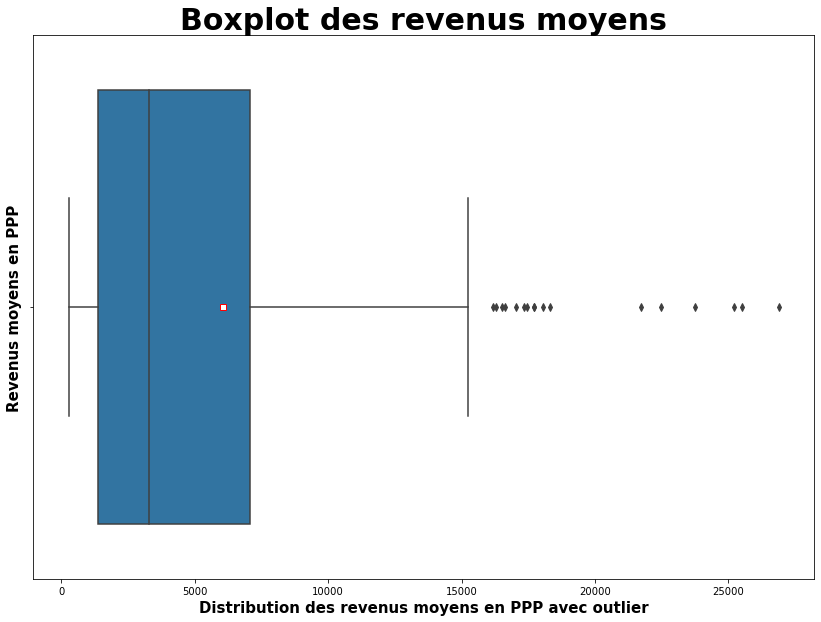

In [18]:
# distribution des revenus moyens
plt.figure(figsize = (14,10))
sns.boxplot(x=data.groupby("country").mean().income,
                orient = "h",
                showfliers = True,
                showmeans = True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"red"})
plt.title("Boxplot des revenus moyens" , fontsize = 30, fontweight = "bold")
plt.xlabel("Distribution des revenus moyens en PPP avec outlier", fontsize = 15, fontweight = "bold")
plt.ylabel("Revenus moyens en PPP", fontsize = 15, fontweight = "bold")
    #plt.ylabel("Véracité du billet", fontsize = 15, fontweight = "bold")
plt.savefig(save + r"\01_boxplot_income_showfliers.png")
plt.show()

L'écart entre la moyenne, la médiane semble indiquer une inégalité entre les différents revenus moyens.<br>
De plus, les valeurs extrêmes (les showfliers) appuient ces inégalités.

<a id='M1P6'></a>
## gdpppp

In [19]:
# pour quels pays mon nombre d'habitants est-il manquant ?
data[(data.gdpppp.isna()) | (data.gdpppp.isnull()) ]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
9000,PSE,2009,1,100,195.28990,NaN
9001,PSE,2009,2,100,264.36533,NaN
9002,PSE,2009,3,100,301.44672,NaN
9003,PSE,2009,4,100,329.83392,NaN
9004,PSE,2009,5,100,348.76495,NaN
...,...,...,...,...,...,...
11395,XKX,2008,96,100,5155.36470,NaN
11396,XKX,2008,97,100,5689.52930,NaN
11397,XKX,2008,98,100,6233.73930,NaN
11398,XKX,2008,99,100,7366.67700,NaN


Il semble inconcevable d'imputer la moyenne des gdpppp de mon df pour remplir mes NaN.<br>
Je vais donc imputer pour chaque pays son gdpppp_capita en ligne avec sa date.

In [20]:
# Pour chaque pays n'ayant pas de gdpppp, je lui impute le gdpppp/hbt qui lui est associé dans le fichier
# data_gdpppp_pays_capita pour la même année d'échantillonnage
for k in data[(data.gdpppp.isna()) | (data.gdpppp.isnull()) ].country.unique():
    annee = int(data[data.country == str(k)].groupby("country").mean().reset_index().year_survey.values)
    data.loc[data[data.country == k].index, "gdpppp"] = float(data_gdpppp_pays_capita[(data_gdpppp_pays_capita["Country Code"]==str(k))][[str(annee)]].values)

In [21]:
# Les deux pays dont les gdpppp_capita m'intéressent
data_gdpppp_pays_capita[data_gdpppp_pays_capita['Country Code'].isin(["PSE", "XKX"])][['2008', '2009']]

,2008,2009
194,3708.664442,3951.234993
259,7249.512758,7506.875447


In [22]:
# df dont les gdpppp ont été imputés
data[(data.country == "PSE") | (data.country == "XKX")]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
9000,PSE,2009,1,100,195.28990,3951.234993
9001,PSE,2009,2,100,264.36533,3951.234993
9002,PSE,2009,3,100,301.44672,3951.234993
9003,PSE,2009,4,100,329.83392,3951.234993
9004,PSE,2009,5,100,348.76495,3951.234993
...,...,...,...,...,...,...
11395,XKX,2008,96,100,5155.36470,7249.512758
11396,XKX,2008,97,100,5689.52930,7249.512758
11397,XKX,2008,98,100,6233.73930,7249.512758
11398,XKX,2008,99,100,7366.67700,7249.512758


Je vérifie que mes deux gdpppp moyens aient été imputés avec la bonne date.

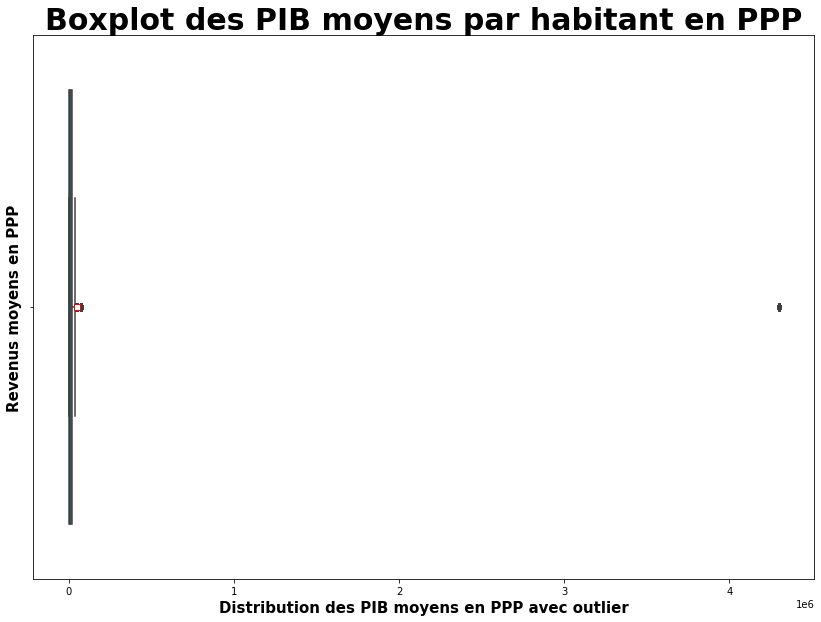

In [23]:
plt.figure(figsize = (14,10))
sns.boxplot(x=data.gdpppp,
                orient = "h",
                showfliers = True,
                showmeans = True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"red"})
plt.title("Boxplot des PIB moyens par habitant en PPP" , fontsize = 30, fontweight = "bold")
plt.xlabel("Distribution des PIB moyens en PPP avec outlier", fontsize = 15, fontweight = "bold")
plt.ylabel("Revenus moyens en PPP", fontsize = 15, fontweight = "bold")
    #plt.ylabel("Véracité du billet", fontsize = 15, fontweight = "bold")
plt.savefig(save + r"\01_boxplot_gdpppp_showfliers.png")
plt.show()

On constate un problème avec une valeur aberrante. Il existerait un pays où le gdp par habitant en ppp serait de 4.3 millions de GDPPPP.

In [24]:
# pays représentant ce max
str(data[data.gdpppp == data.gdpppp.max()].groupby("country").mean().reset_index().iloc[0,0])

'FJI'

Les îles Fidji présentent un problème de GDPPPP moyen par habitant.

In [25]:
# année de ce gdpppp
int(data[data.gdpppp == data.gdpppp.max()].groupby("country").mean().reset_index().iloc[0,1])

2008

L'échantillonnage est en 2008.

In [26]:
# gdpppp outlier
"{:,.2f}".format(int(data[data.gdpppp == data.gdpppp.max()].groupby("country").mean().reset_index().iloc[0,5])).replace(",", " ")

'4 300 332.00'

Valeur de mon GDPPPP aberrant

In [27]:
# montant du gdpppp réel selon la WDI
float(data_gdpppp_pays_capita.loc[data_gdpppp_pays_capita[data_gdpppp_pays_capita["Country Code"] == data[data.gdpppp == data.gdpppp.max()].groupby("country").mean().reset_index().iloc[0,0]].index, str(int(data[data.gdpppp == data.gdpppp.max()].groupby("country").mean().reset_index().iloc[0,1]))].values)

7777.6926915737795

Le montant réel du GDPPPP fidjien est de 7 777.69 PPP, d'après la WDI.

In [28]:
# je remplace dans mon df data le gdpppp
data.loc[data[data.gdpppp == data.gdpppp.max()].index, "gdpppp"] = float(data_gdpppp_pays_capita.loc[data_gdpppp_pays_capita[data_gdpppp_pays_capita["Country Code"] == data[data.gdpppp == data.gdpppp.max()].groupby("country").mean().reset_index().iloc[0,0]].index, str(int(data[data.gdpppp == data.gdpppp.max()].groupby("country").mean().reset_index().iloc[0,1]))].values)

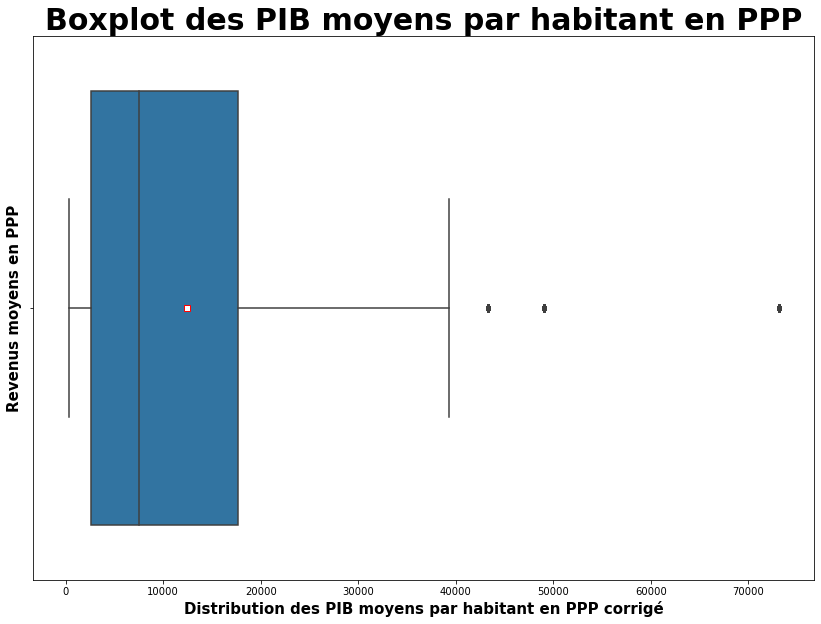

In [29]:
# allure de mes distributions de gdpppp réelles.
plt.figure(figsize = (14,10))
sns.boxplot(x=data.gdpppp,
                orient = "h",
                showfliers = True,
                showmeans = True,
                meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"red"})
plt.title("Boxplot des PIB moyens par habitant en PPP" , fontsize = 30, fontweight = "bold")
plt.xlabel("Distribution des PIB moyens par habitant en PPP corrigé", fontsize = 15, fontweight = "bold")
plt.ylabel("Revenus moyens en PPP", fontsize = 15, fontweight = "bold")
    #plt.ylabel("Véracité du billet", fontsize = 15, fontweight = "bold")
plt.savefig(save + r"\01_boxplot_gdpppp_showfliers_corrected.png")
plt.show()

<a id='M1P7'></a>
## Population mondiale et échantillon

In [30]:
# je conserve les données qui m'intéressent
data_pop_monde = data_pop_monde[["Country Code", "2007", "2008"]]

# je renomme les colonnes
data_pop_monde.columns = [str(x) +"_pop" for x in data_pop_monde.columns]

# allure df
data_pop_monde

,Country Code_pop,2007_pop,2008_pop
0,ABW,101222.0,101358.0
1,AFG,27100536.0,27722276.0
2,AGO,20905363.0,21695634.0
3,ALB,2970017.0,2947314.0
4,AND,82684.0,83862.0
...,...,...,...
259,XKX,1733404.0,1747383.0
260,YEM,21282515.0,21892146.0
261,ZAF,49119766.0,49779472.0
262,ZMB,12502958.0,12848530.0


In [31]:
# trouve dans mon df population la ligne WLD et la colonne 2008 ==> population mondiale 2008
"{:,.2f}".format(float(data_pop_monde.loc[data_pop_monde[data_pop_monde['Country Code_pop'] == "WLD"].index.values,"2008_pop"].values)).replace(",", " ")

'6 757 020 830.00'

D'après la WDI, la population mondiale de 2008 est de 6,8 milliards de personnes.<br>
Je rajoute, pour chaque pays, sa population en 2018 dans le df data.

In [32]:
data = data.merge(data_pop_monde[["Country Code_pop", "2008_pop"]],
                  how = 'left',
                  left_on = "country",
                  right_on = "Country Code_pop")
data.drop("Country Code_pop", axis = 1, inplace = True)
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop
0,ALB,2008,1,100,728.89795,7297.0,2947314.0
1,ALB,2008,2,100,916.66235,7297.0,2947314.0
2,ALB,2008,3,100,1010.91600,7297.0,2947314.0
3,ALB,2008,4,100,1086.90780,7297.0,2947314.0
4,ALB,2008,5,100,1132.69970,7297.0,2947314.0
...,...,...,...,...,...,...,...
11595,ZAF,2008,96,100,24553.56800,9602.0,49779472.0
11596,ZAF,2008,97,100,28858.03100,9602.0,49779472.0
11597,ZAF,2008,98,100,35750.29000,9602.0,49779472.0
11598,ZAF,2008,99,100,46297.31600,9602.0,49779472.0


Je regarde les valeurs NaN de mon df.

In [33]:
data[data['2008_pop'].isna()]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop
10500,TWN,2008,1,100,3477.1800,25342.0,NaN
10501,TWN,2008,2,100,4740.2637,25342.0,NaN
10502,TWN,2008,3,100,5331.3013,25342.0,NaN
10503,TWN,2008,4,100,5761.6577,25342.0,NaN
10504,TWN,2008,5,100,6093.2017,25342.0,NaN
...,...,...,...,...,...,...,...
10595,TWN,2008,96,100,38123.4600,25342.0,NaN
10596,TWN,2008,97,100,41663.7900,25342.0,NaN
10597,TWN,2008,98,100,46650.5820,25342.0,NaN
10598,TWN,2008,99,100,54016.9920,25342.0,NaN


Je souhaite imputer la population de Taïwan en 2008.<br>
Daprès le site suivant, https://countryeconomy.com/demography/population/taiwan?year=2008, Taïwan dispose de 23,037,000 habitants. J'impute donc cette valeur.

In [34]:
data.loc[data[data['country'] == 'TWN'].index, "2008_pop"] = 23037000

In [35]:
# population étudiée
print("La population des pays présents dans mon df représente",
      "{:,.2%}".format(data.groupby("country").mean()['2008_pop'].sum() / float(data_pop_monde.loc[data_pop_monde[data_pop_monde['Country Code_pop'] == "WLD"].index.values,"2008_pop"].values)),
      "de la population mondiale de",
      "{:,.2f}".format(float(data_pop_monde.loc[data_pop_monde[data_pop_monde['Country Code_pop'] == "WLD"].index.values,"2008_pop"].values)).replace(",", " "),
      "habitants."
     )

La population des pays présents dans mon df représente 91.81% de la population mondiale de 6 757 020 830.00 habitants.


J'étudie mes revenus en centiles, à savoir les 100 parties égales de mes revenus nationaux, pays par pays en $PPP.<br>
L'échantillonnage en centile me permet d'avoir une mesure en %age des revenus de la population. L'étude me propose donc des mesures statistiques.

Echantillonner mes revenus nationaux en quantiles permet de résumer l'information de millions de lignes en une centaine de lignes pour chaque pays. Si une partie de l'information est perdue, elle permet toutefois d'en résumer les réalités assez finemenent en proposant 100 classes de revenus différentes pour les centiles, ou 10 classes de revenus différentes pour les déciles ou 1000 classes de revenus différentes pour les milliles.

D'après l'énoncé, je cherche maintenant à prédire le revenu moyen des futurs actifs de mes pays en fonction de :
- revenu moyen de chaque pays
- indice de Gini de chaque pays
- classe de revenu des parents

Pour mettre en place ces tests:
- je calcule les revenus moyens de chaque pays.
- j'importe les indices de Gini de chaque pays d'un autre df de la WDI.
- j'étudie des éventuels profils types de pays avec un clustering, conjuguant revenus moyens et indices de Gini.

<a id='M2'></a>
# Mission 02

<a id='M2P1'></a>
## Revenu moyen
Je le stocke dans la colonne "income_mean"

In [36]:
data = data.merge(data.groupby("country").mean().reset_index().rename(columns = {"income" : "income_mean"})[["country", "income_mean"]],
                          how = "left",
                          on = "country")
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop,income_mean
0,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902
1,ALB,2008,2,100,916.66235,7297.0,2947314.0,2994.829902
2,ALB,2008,3,100,1010.91600,7297.0,2947314.0,2994.829902
3,ALB,2008,4,100,1086.90780,7297.0,2947314.0,2994.829902
4,ALB,2008,5,100,1132.69970,7297.0,2947314.0,2994.829902
...,...,...,...,...,...,...,...,...
11595,ZAF,2008,96,100,24553.56800,9602.0,49779472.0,5617.904880
11596,ZAF,2008,97,100,28858.03100,9602.0,49779472.0,5617.904880
11597,ZAF,2008,98,100,35750.29000,9602.0,49779472.0,5617.904880
11598,ZAF,2008,99,100,46297.31600,9602.0,49779472.0,5617.904880


<a id='M2P2'></a>
## Indices de Gini

In [37]:
# je renonce aux indices de gini post-2008
data_gini = data_gini.loc[:,:"2011"]

# je supprime les colonnes remplies de NaN
data_gini.dropna(axis = 1, how = "all", inplace = True)

# je sélectionne les lignes où il existe au moins une valeur non NaN
data_gini = data_gini[data_gini.index.isin(data_gini.iloc[:,4:].dropna(axis = 0, how = "all").index)]

# je remplis mes NaN intermédiaires de gauche à droite, avec la dernière valeur existante à gauche
data_gini.iloc[:,4:] = data_gini.iloc[:,4:].fillna(method = "ffill", axis = 1)

# je remplis mes NaN depuis 1967 de droite à gauche avec la dernière valeur existante à droite
data_gini.iloc[:,4:] = data_gini.iloc[:,4:].fillna(method = "bfill", axis = 1)

# aspect df
data_gini.reset_index(drop = True, inplace = True)
data_gini

,Country Name,Country Code,Indicator Name,Indicator Code,1967,1969,1971,1974,1975,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Angola,AGO,Gini,SI.POV.GINI,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,42.7,42.7,42.7,42.7
1,Albania,ALB,Gini,SI.POV.GINI,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,31.7,31.7,31.7,30.6,30.6,30.6,30.0,30.0,30.0,30.0
2,Argentina,ARG,Gini,SI.POV.GINI,40.8,40.8,40.8,40.8,40.8,40.8,40.8,40.8,40.8,40.8,40.8,40.8,40.8,42.8,45.3,45.3,45.3,45.3,46.8,45.5,44.9,45.9,48.9,49.5,49.1,50.7,49.8,51.1,53.3,53.8,50.9,48.4,47.7,46.3,46.2,44.9,43.7,43.6,42.6
3,Armenia,ARM,Gini,SI.POV.GINI,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,36.2,35.4,34.8,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4
4,Australia,AUS,Gini,SI.POV.GINI,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.3,32.5,32.5,32.5,32.5,33.2,33.2,33.2,33.2,33.2,33.2,32.6,32.6,32.6,32.6,32.6,32.6,33.5,33.5,33.5,33.1,33.1,33.1,33.1,35.4,35.4,34.7,34.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Kosovo,XKX,Gini,SI.POV.GINI,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,31.2,30.3,30.3,30.3,31.8,33.3,27.8
155,"Yemen, Rep.",YEM,Gini,SI.POV.GINI,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,34.7,34.7,34.7,34.7,34.7,34.7,34.7
156,South Africa,ZAF,Gini,SI.POV.GINI,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,59.3,60.7,60.7,60.7,60.7,57.8,57.8,57.8,57.8,57.8,64.8,64.8,64.8,63.0,63.0,63.4,63.4
157,Zambia,ZMB,Gini,SI.POV.GINI,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,60.5,52.6,52.6,52.6,48.3,48.3,49.1,49.1,49.1,49.1,42.1,42.1,54.3,54.3,54.6,54.6,54.6,54.6,55.6,55.6


### Gini en fonction de la date

In [38]:
# je crée la colonne gini dans le df data
data['gini'] = 0

# je rajoute en fonction du pays et de la date, l'indice de gini associé pour chaque pays
for i in np.sort(data.year_survey.unique()):
    for j in np.sort(data[data.year_survey == i].country.unique()):
        if len(data_gini[data_gini["Country Code"] == str(j)])>0:
            data.loc[data[(data.year_survey == i) & (data.country == j)].index, "gini"] = data_gini[str(i)][int(data_gini[data_gini["Country Code"] == str(j)].index.values)]

Malgré le merge, je conserve des Gini nuls.<br>
J'impute donc, pour chaque indice nul, le Gini calculé sur la base des centiles dans la colonne __income__.

### Ginis nuls remplacés par Ginis calculés

In [39]:
# Je remplis mes Gini nuls en les remplaçant par le Gini calculé sur mes centiles
for k in data[data.gini == 0].country.unique():
    
    # je rabats mes séries
    centiles = data[data.country == k].income
    n = len(centiles)
    
    # je calcule mes ordonnées de Lorenz
    lorenz_centiles = np.cumsum(np.sort(centiles)) / centiles.sum()
    lorenz_centiles = np.append([0],lorenz_centiles) # La courbe de Lorenz commence à 0

    # je calcule mon gini
    gini_centile = 2*(0.5 - ( (lorenz_centiles.sum() - lorenz_centiles[-1]/2 - lorenz_centiles[0]/2) /n ) )
    
    # j'impute dans data
    data.loc[data[data.country == k].index.values, "gini"] = gini_centile*100

### Gini de l'Afrique du Sud : vérification

In [40]:
# L'indice de gini de l'afrique du sud est de 63 dans le fichier data_gini
data[data.country == "ZAF"].gini.mean()

63.0

In [41]:
# je rabats mes séries
centiles = data[data.country == "ZAF"].income
n = len(centiles)

# je calcule mes ordonnées de Lorenz
lorenz_centiles = np.cumsum(np.sort(centiles)) / centiles.sum()
lorenz_centiles = np.append([0],lorenz_centiles) # La courbe de Lorenz commence à 0

# je calcule mon gini
gini_centile = 2*(0.5 - ( (lorenz_centiles.sum() - lorenz_centiles[-1]/2 - lorenz_centiles[0]/2) /n ) )

# j'affiche
gini_centile

0.669778501189596

Le gini de l'Afrique du Sud calculé sur les centiles est de 66.98%. Il reste dans le même ordre de grandeur que celui de la WDI qui est de 63%. Cette méthode d'imputation me convient.<br>
Maintenant, je vais renseigner dans mon df le nombre de Gini uniques pour chaque pays présents dans le df data_gini. Pour chaque groupement, je privilégie le plus grand nombre de Gini. 

In [42]:
# je crée une colonne nb_gini_unique
data["nb_gini_unique"] = 1

# pour chaque pays de mon df, je remplis avec le nombre de gini uniques associés
for k in data.country.unique():
    if len(data_gini[data_gini["Country Code"] == k])>0:
        data.loc[data[data.country == k].index, "nb_gini_unique"] = int(data_gini.iloc[data_gini[data_gini["Country Code"] == k].index.values, 4:].nunique(axis = 1).values)

Je souhaite maintenant compléter mon df avec :
- le nom des pays plus lisibles
- la classification géographique de chaque pays
- la classification économique de chaque distribution de revenus de chaque pays

<a id='M2P3'></a>
## Classification géo et éco

In [43]:
# Je regarde ma table de description des pays
table_pays

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN
...,...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep.",NaN
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [44]:
# Je supprime les colonnes qui ne m'intéressent pas
table_pays.drop(["SpecialNotes", "Unnamed: 5"], axis = 1, inplace = True)

In [45]:
# Je réarange ma table comme je le souhaite
table_pays = table_pays[["Country Code", "TableName", "Region", "IncomeGroup"]]
table_pays

,Country Code,TableName,Region,IncomeGroup
0,ABW,Aruba,Latin America & Caribbean,High income
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Lower middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income
...,...,...,...,...
258,XKX,Kosovo,Europe & Central Asia,Upper middle income
259,YEM,"Yemen, Rep.",Middle East & North Africa,Low income
260,ZAF,South Africa,Sub-Saharan Africa,Upper middle income
261,ZMB,Zambia,Sub-Saharan Africa,Lower middle income


In [46]:
# je merge dans mon df data les colonnes Region, IncomeGroup, TableName
data = data.merge(table_pays[["Country Code","Region", "IncomeGroup", "TableName"]],
           how = "left",
           left_on = "country",
           right_on = "Country Code")
data.drop("Country Code", axis = 1, inplace = True)
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop,income_mean,gini,nb_gini_unique,Region,IncomeGroup,TableName
0,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania
1,ALB,2008,2,100,916.66235,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania
2,ALB,2008,3,100,1010.91600,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania
3,ALB,2008,4,100,1086.90780,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania
4,ALB,2008,5,100,1132.69970,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,ZAF,2008,96,100,24553.56800,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa
11596,ZAF,2008,97,100,28858.03100,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa
11597,ZAF,2008,98,100,35750.29000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa
11598,ZAF,2008,99,100,46297.31600,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa


### Traitement des NaN

In [47]:
data[data.Region.isna()]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop,income_mean,gini,nb_gini_unique,Region,IncomeGroup,TableName
10500,TWN,2008,1,100,3477.1800,25342.0,23037000.0,16500.22367,31.480138,1,NaN,NaN,NaN
10501,TWN,2008,2,100,4740.2637,25342.0,23037000.0,16500.22367,31.480138,1,NaN,NaN,NaN
10502,TWN,2008,3,100,5331.3013,25342.0,23037000.0,16500.22367,31.480138,1,NaN,NaN,NaN
10503,TWN,2008,4,100,5761.6577,25342.0,23037000.0,16500.22367,31.480138,1,NaN,NaN,NaN
10504,TWN,2008,5,100,6093.2017,25342.0,23037000.0,16500.22367,31.480138,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,TWN,2008,96,100,38123.4600,25342.0,23037000.0,16500.22367,31.480138,1,NaN,NaN,NaN
10596,TWN,2008,97,100,41663.7900,25342.0,23037000.0,16500.22367,31.480138,1,NaN,NaN,NaN
10597,TWN,2008,98,100,46650.5820,25342.0,23037000.0,16500.22367,31.480138,1,NaN,NaN,NaN
10598,TWN,2008,99,100,54016.9920,25342.0,23037000.0,16500.22367,31.480138,1,NaN,NaN,NaN


J'impute les classifications probables pour Taïwan selon mon poit de vue et selon les classifications en GDPPPP et ditributions d'income.

In [48]:
# Je remplis pour Taïwan
data.loc[data[data.Region.isna()].index, "Region"] = "East Asia & Pacific"
data.loc[data[data.IncomeGroup.isna()].index, "IncomeGroup"] = "High income"
data.loc[data[data.TableName.isna()].index, "TableName"] = "Taïwan"

Je souhaite à présent sélectionner entre cinq et dix pays selon leurs profils.<br>
Je m'intéresse à deux classifications différentes possibles:
- Classification Hiérarchique Ascendante
- K-means

<a id='M2P4'></a>
## Classification Hiérarchique Ascendante

### CAH

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing, decomposition


# 1.Préparation des données pour le clustering
X = data.groupby('TableName').mean().reset_index().iloc[:,1:].values
names = data.groupby('TableName').mean().reset_index().TableName.values

# 2.Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# 3.Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# 4.Coupage du dendrogramme en 10 clusters
clusters = fcluster(Z, 10, criterion='maxclust')

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
classif = pd.DataFrame({"Zone" : names,
                        "cluster_cah": clusters})
classif

,Zone,cluster_cah
0,Albania,6
1,Argentina,8
2,Armenia,5
3,Austria,2
4,Azerbaijan,6
...,...,...
111,Uruguay,8
112,"Venezuela, RB",4
113,Vietnam,4
114,West Bank and Gaza,10


### Dendrogram

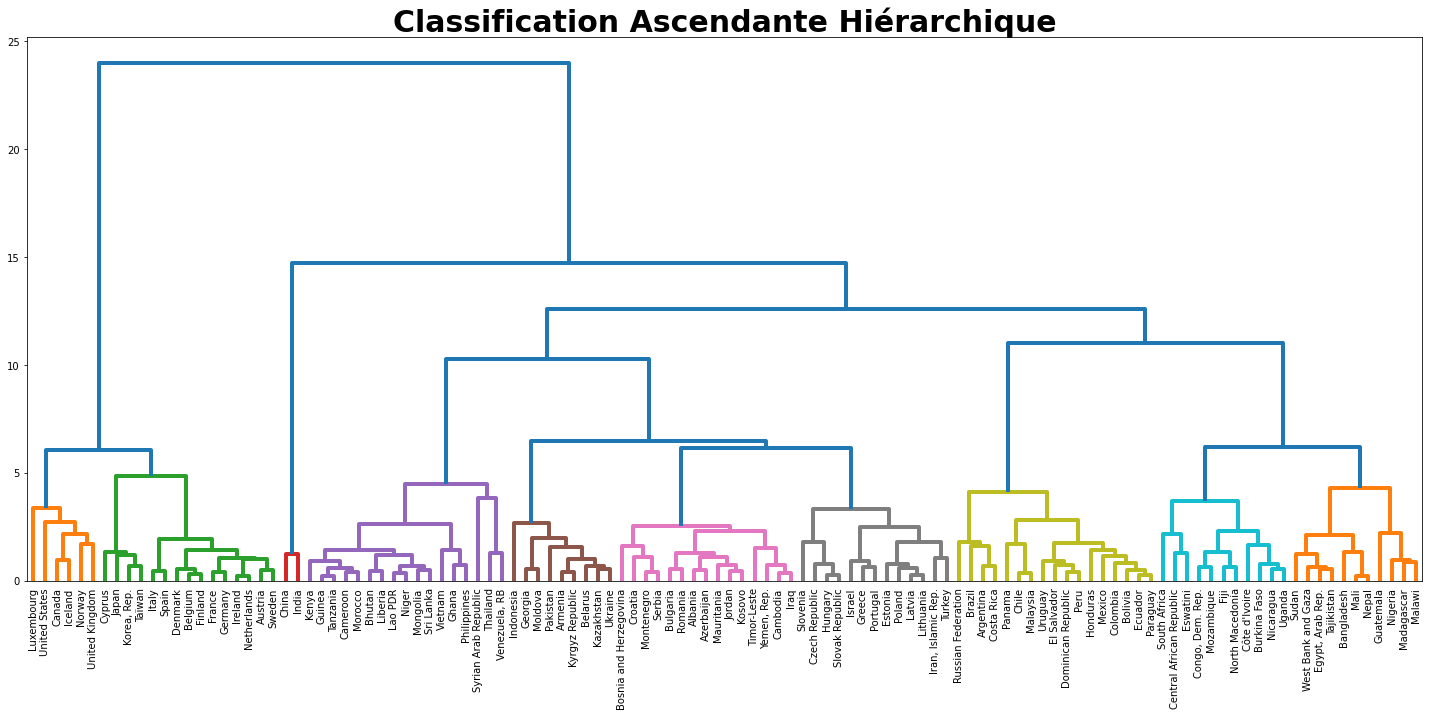

In [50]:
plt.rcParams['lines.linewidth'] = 4
# Mise en forme du dendrogram
plt.figure(figsize=(25,10))
dendrogram(Z,
           labels = names,orientation = "top",
           leaf_font_size=10,
           color_threshold = 6,
           above_threshold_color='C10')
plt.title("Classification Ascendante Hiérarchique", fontsize = 30, fontweight = "bold")

plt.savefig(save + r"\02_dendrogram.png")
plt.show()

In [51]:
# je rappatrie dans le df data mes clusters CAH
data = data.merge(classif,
                  how = "left",
                  left_on = "TableName",
                  right_on = "Zone"
                 ).drop("Zone", axis = 1)

data

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop,income_mean,gini,nb_gini_unique,Region,IncomeGroup,TableName,cluster_cah
0,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6
1,ALB,2008,2,100,916.66235,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6
2,ALB,2008,3,100,1010.91600,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6
3,ALB,2008,4,100,1086.90780,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6
4,ALB,2008,5,100,1132.69970,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,ZAF,2008,96,100,24553.56800,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9
11596,ZAF,2008,97,100,28858.03100,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9
11597,ZAF,2008,98,100,35750.29000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9
11598,ZAF,2008,99,100,46297.31600,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9


Malgré ces éléments de réserve, je sélectionne pour chaque cluster le pays avec le Gini le plus élevé.
<a id='M2P5'></a>
### Sélection de pays

In [52]:
# je crée une liste de pays
liste_pays_cah = np.array([])

# je récupère un pays par Cluster
for k in np.sort(data.cluster_cah.unique()):
    liste_pays_cah = np.append(liste_pays_cah, np.array([data[data.cluster_cah == k].groupby("TableName").mean().reset_index().sort_values("gini", ascending = False).head(1).iloc[0,0]]))

print("Les pays de chaque cluster avec un indice de Gini le plus élevé sont :", liste_pays_cah)

Les pays de chaque cluster avec un indice de Gini le plus élevé sont : ['United States' 'Japan' 'China' 'Philippines' 'Georgia' 'Romania'
 'Iran, Islamic Rep.' 'Honduras' 'South Africa' 'Guatemala']


<a id='M2P5'></a>
### Graphique logarithmique

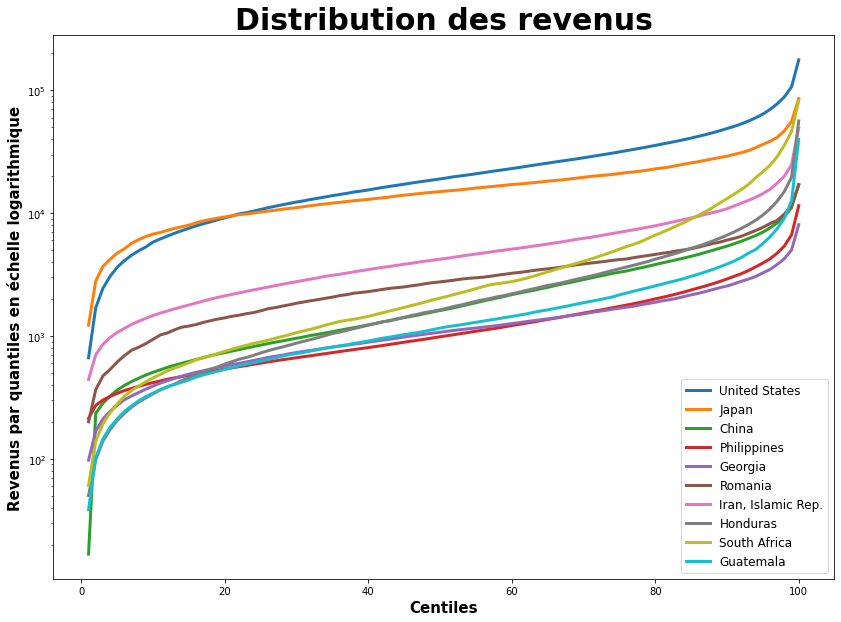

In [53]:
plt.rcParams['lines.linewidth'] = 3

plt.figure(figsize = (14,10))

for k in liste_pays_cah:
        plt.plot(data[data.TableName == k]['quantile'], data[data.TableName == k].income,
             linewidth = 3,
             label = data[data.TableName == k].groupby('TableName').mean().reset_index().iloc[0,0])
            


plt.title("Distribution des revenus" , fontsize = 30, fontweight = "bold")
plt.xlabel("Centiles", fontsize = 15, fontweight = "bold")
plt.ylabel("Revenus par quantiles en échelle logarithmique", fontsize = 15, fontweight = "bold")
plt.yscale("log")
plt.legend(fontsize = 12)
plt.savefig(save + r"\01_plot_10cah.png")
plt.show()

<a id='M2P6'></a>
### Limites

À mon sens, il n'y a pas de profil type se détachant clairement du graphique. Le choix du nombre de clusters me pose question. À titre d'exemple :
- la classification des pays africains est très hétérogène et peu lisible
- Chine et Inde sont dans le même cluster, mais ils ne présentent pas réellement le même type de revenus ni le même type d'économie
- Les pays sud-américains sont tous dans le même cluster malgré leurs spécificités : Brazil vs Colombia

Je cherche donc un autre moyen de comprendre le nombre de clusters optimal. Je vais donc procéder par K-means et confirmer ou infirmer mes réserves exprimées ci-dessus.

<a id='M2P7'></a>
## Choix des pays - K-means

### Nombre de clusters optimal (entre cinq et dix)

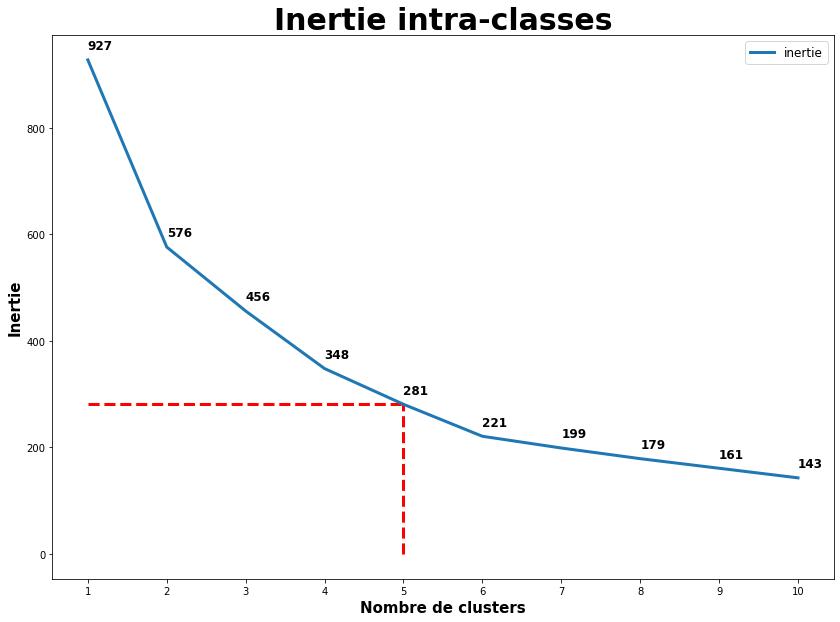

In [54]:
#librairie pour évaluation des partitions
from sklearn import metrics, cluster

# je centre-réduit mes champs valeurs
X_scaled = preprocessing.StandardScaler().fit_transform(data.groupby('TableName').mean().reset_index().iloc[:,1:].values)

# Je calcule mes inerties
res = np.arange(10)
for k in np.arange(10):
    km = cluster.KMeans(n_clusters=k+1)
    km.fit(X_scaled)
    res[k] = km.inertia_

# allure des inerties
plt.figure(figsize = (14,10))
for k in np.arange(10):
    plt.text(k+1, res[k]+20, str(res[k]), fontsize = 12, fontweight = "bold")
plt.plot(np.arange(10)+1 ,res, label = "inertie")
plt.xticks(np.arange(10)+1)
plt.hlines(res[4], 1, 5, linestyles='--', color = 'r')
plt.vlines(5, 0, res[4], linestyles='--', color = "r")
plt.legend(loc="upper right", fontsize = 12)
plt.xlabel('Nombre de clusters', fontweight='bold', fontsize = 15)
plt.ylabel('Inertie', fontweight='bold', fontsize = 15)
plt.title('Inertie intra-classes', fontweight = "bold", fontsize = 30)
plt.savefig(save + r"\02_km_inertie_intra_classe.png")
plt.show()

La méthode du coude me suggèrerait entre 3 et 4 clusters. Je choisis 5 clusters, comme demandé dans l'énoncé (entre cinq et dix).

### Kmeans

In [55]:
from sklearn.cluster import KMeans

# Nombre de clusters souhaités
n_clust = 5

# préparation des données pour le clustering
X = data.groupby('TableName').mean().reset_index().iloc[:,1:].values
names = data.groupby('TableName').mean().reset_index().TableName.values

# Centrage-réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters = n_clust)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = pd.DataFrame({"Zone" : names,
                         "cluster_km" : km.labels_ })

clusters

,Zone,cluster_km
0,Albania,2
1,Argentina,0
2,Armenia,2
3,Austria,1
4,Azerbaijan,2
...,...,...
111,Uruguay,0
112,"Venezuela, RB",2
113,Vietnam,2
114,West Bank and Gaza,3


In [56]:
# je rapatrie dans mon df la classification K-means
data = data.merge(clusters,
                  how = "left",
                  left_on = "TableName",
                  right_on = "Zone").drop("Zone", axis = 1)

data

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop,income_mean,gini,nb_gini_unique,Region,IncomeGroup,TableName,cluster_cah,cluster_km
0,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2
1,ALB,2008,2,100,916.66235,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2
2,ALB,2008,3,100,1010.91600,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2
3,ALB,2008,4,100,1086.90780,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2
4,ALB,2008,5,100,1132.69970,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,ZAF,2008,96,100,24553.56800,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0
11596,ZAF,2008,97,100,28858.03100,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0
11597,ZAF,2008,98,100,35750.29000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0
11598,ZAF,2008,99,100,46297.31600,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0


Je fais une sélection, pour chaque cluster :
- Les indices de Gini les plus élevés
- Les indices de Gini les plus faibles

In [57]:
# je crée une liste de pays
liste_pays_km_max = np.array([])
liste_pays_km_min = np.array([])

# je récupère un pays par Cluster
for k in np.sort(data.cluster_km.unique()):
    liste_pays_km_max = np.append(liste_pays_km_max, np.array([data[data.cluster_km == k].groupby("TableName").mean().reset_index().sort_values("gini", ascending = False).head(1).iloc[0,0]]))
    liste_pays_km_min = np.append(liste_pays_km_min, np.array([data[data.cluster_km == k].groupby("TableName").mean().reset_index().sort_values("gini", ascending = True).head(1).iloc[0,0]]))

print("Les pays à indices de Gini plus élevés, cluster par cluster, sont :", liste_pays_km_max)
print("Les pays à indices de Gini plus faibles, cluster par cluster, sont :", liste_pays_km_min)

Les pays à indices de Gini plus élevés, cluster par cluster, sont : ['South Africa' 'United States' 'Philippines' 'Central African Republic'
 'China']
Les pays à indices de Gini plus faibles, cluster par cluster, sont : ['Indonesia' 'Denmark' 'Slovenia' 'Tajikistan' 'India']


J'illustre les distribution de ces deux groupes de pays dans des graphiques logarithmiques.
<a id='M2P8'></a>
### Graphique logarithmique - Gini Max et Gini Min

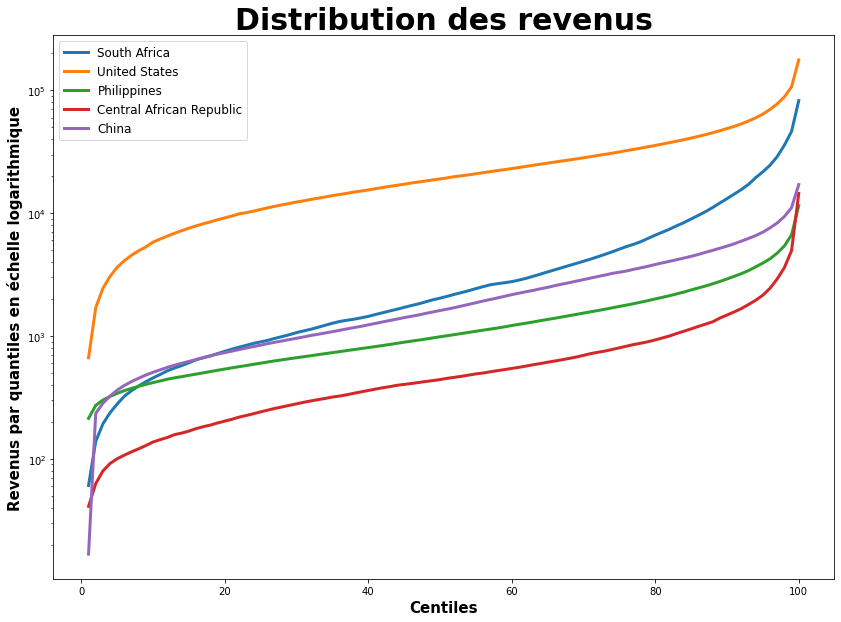

In [58]:
plt.figure(figsize = (14,10))

for k in liste_pays_km_max:
    plt.plot(data[data.TableName == k]['quantile'], data[data.TableName == k].income,
             linewidth= 3,
             label = data[data.TableName == k].groupby('TableName').mean().reset_index().iloc[0,0])

plt.title("Distribution des revenus" , fontsize = 30, fontweight = "bold")
plt.xlabel("Centiles", fontsize = 15, fontweight = "bold")
plt.ylabel("Revenus par quantiles en échelle logarithmique", fontsize = 15, fontweight = "bold")
plt.yscale("log")
plt.legend(fontsize = 12)
plt.savefig(save + r"\02_plot_5km_max.png")
plt.show()

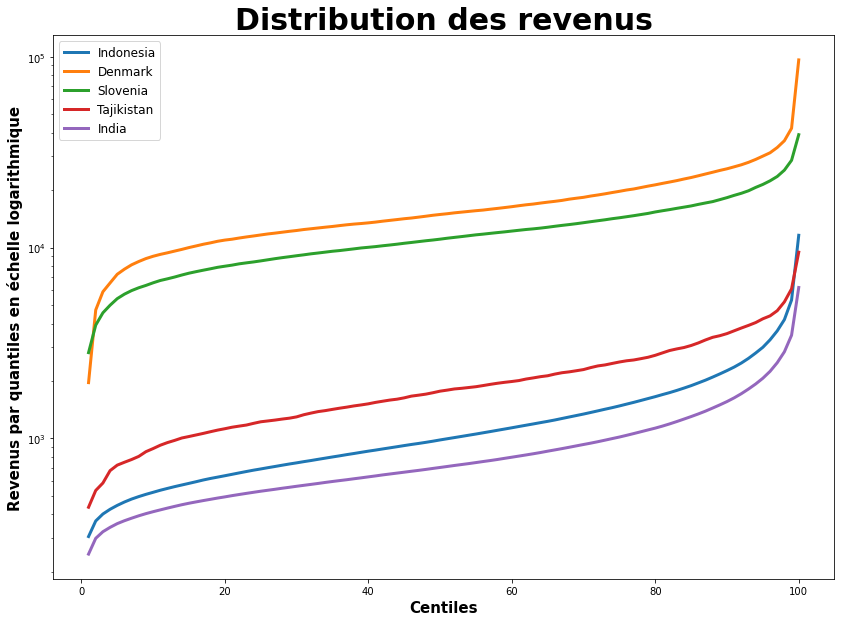

In [59]:
plt.figure(figsize = (14,10))

for k in liste_pays_km_min:
    plt.plot(data[data.TableName == k]['quantile'], data[data.TableName == k].income,
             linewidth= 3,
             label = data[data.TableName == k].groupby('TableName').mean().reset_index().iloc[0,0])

plt.title("Distribution des revenus" , fontsize = 30, fontweight = "bold")
plt.xlabel("Centiles", fontsize = 15, fontweight = "bold")
plt.ylabel("Revenus par quantiles en échelle logarithmique", fontsize = 15, fontweight = "bold")
plt.yscale("log")
plt.legend(fontsize = 12)
plt.savefig(save + r"\02_plot_5km_min.png")
plt.show()

Au regard de mes différents graphs, je perçois cinq types de profils intéressants : 
- Gini élevé & revenu moyen élevé : USA
- Gini élevé & revenu moyen moyen : Afrique du Sud
- Gini élevé & revenu faible : République Centre-africaine
- Gini faible & revenu moyen élevé : Slovénie
- Gini faible & revenu moyen faible : Inde

<a id='M2P9'></a>
### Graphique logarithmique final

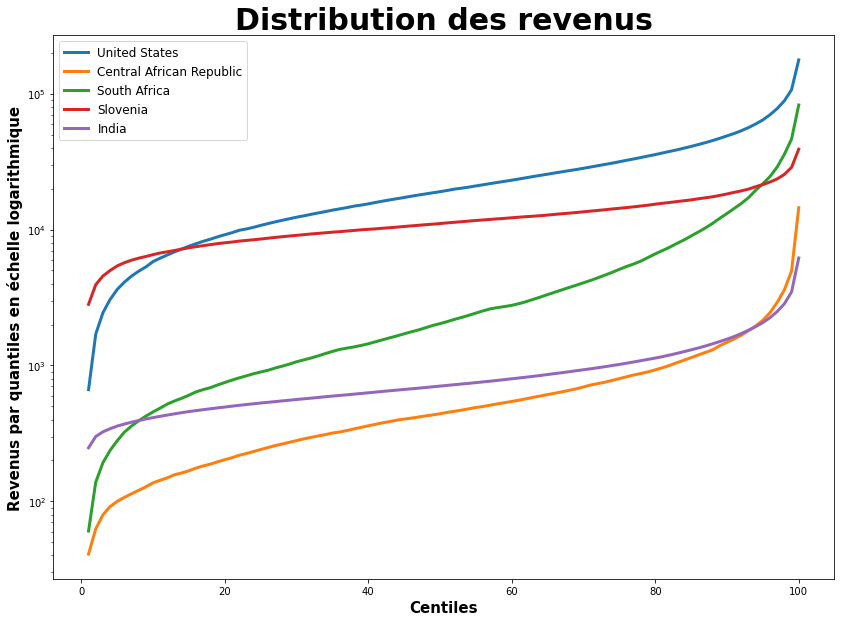

In [60]:
liste_pays_km = ['United States', 'Central African Republic', 'South Africa', 'Slovenia', 'India']

plt.figure(figsize = (14,10))

for k in liste_pays_km:
    plt.plot(data[data.TableName == k]['quantile'], data[data.TableName == k].income,
             linewidth= 3,
             label = data[data.TableName == k].groupby('TableName').mean().reset_index().iloc[0,0])

plt.title("Distribution des revenus" , fontsize = 30, fontweight = "bold")
plt.xlabel("Centiles", fontsize = 15, fontweight = "bold")
plt.ylabel("Revenus par quantiles en échelle logarithmique", fontsize = 15, fontweight = "bold")
plt.yscale("log")
plt.legend(fontsize = 12)
plt.savefig(save + r"\02_plot_5km.png")
plt.show()

<a id='M2P10'></a>
### Lorenz & Ginis

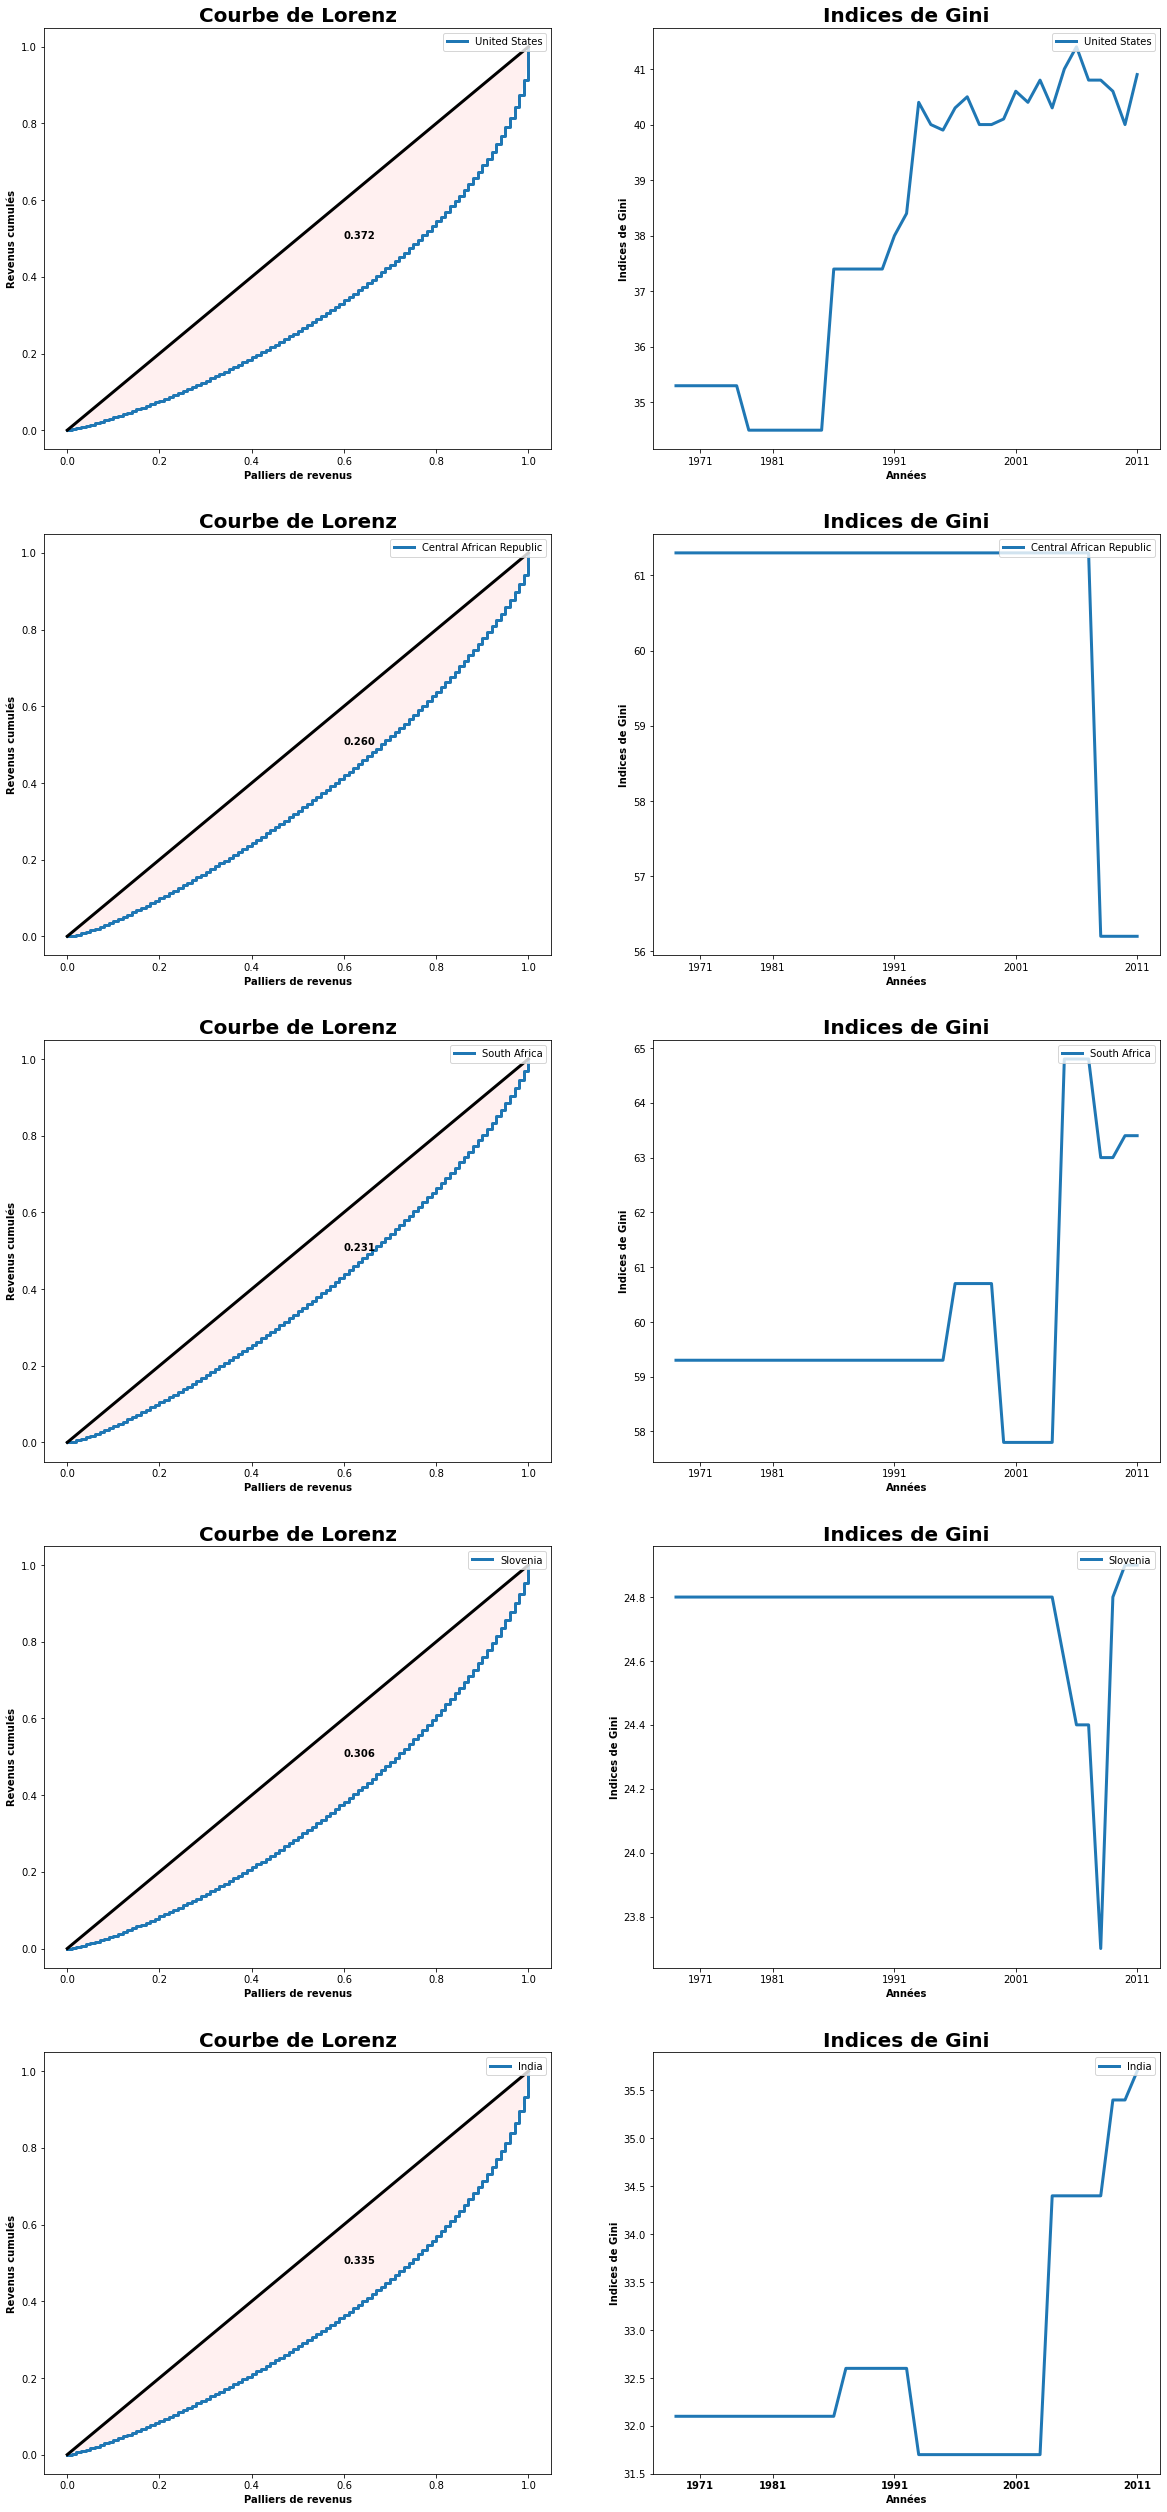

In [61]:
fig, axes = plt.subplots(len(liste_pays_km), 2 ,sharex=False, figsize=(20, 45))

plt.xticks(fontweight = "bold")
for k in range(len(liste_pays_km)):
        
        # j'importe mes séries
        centiles = data[data.TableName == liste_pays_km_min[k]].income
        n = len(centiles)
        gini = data_gini[data_gini['Country Name'] == liste_pays_km[k]].iloc[:,4:].transpose()
        
        # je calcule mes ordonnées de Lorenz
        lorenz_centiles = np.cumsum(np.sort(centiles)) / centiles.sum()
        lorenz_centiles = np.append([0],lorenz_centiles) # La courbe de Lorenz commence à 0
        xaxis = np.linspace(0,1,len(lorenz_centiles))
        
        # je calcule mon gini
        gini_centile = 2*(0.5 - ( (lorenz_centiles.sum() - lorenz_centiles[-1]/2 - lorenz_centiles[0]/2) /n ) )
 
        # je fixe mes deux plots, mon aire colorée et ma légende
        axes[k, 0].plot(xaxis,lorenz_centiles, drawstyle='steps-post', label = liste_pays_km[k])
        axes[k, 0].plot([0,1], [0,1], color='black')
        axes[k, 0].fill_between(xaxis, lorenz_centiles, xaxis, color='#fff0f0')
        axes[k, 0].legend(loc="upper right")
        
        axes[k, 1].plot(gini.index, gini, label = liste_pays_km[k])
        axes[k, 1].legend(loc="upper right")

        # set-up des plots
        axes[k, 0].set_xlabel('Palliers de revenus', fontweight='bold')
        axes[k, 0].set_ylabel('Revenus cumulés', fontweight='bold')
        axes[k, 0].set_title('Courbe de Lorenz', fontweight = "bold", fontsize = 20)
        axes[k, 0].text(0.6, 0.5, "{:,.3f}".format(gini_centile), fontsize = 10, fontweight = "bold")
        axes[k, 1].set_xlabel('Années', fontweight='bold')
        axes[k, 1].set_ylabel('Indices de Gini', fontweight='bold')
        axes[k, 1].set_title('Indices de Gini', fontweight = "bold", fontsize = 20)
        axes[k, 1].xaxis.set_ticks(['1971','1981', '1991', '2001', '2011' ])

plt.savefig(save + r"\02_km_subplots_lorenz_gini.png")
plt.show()

<a id='M2P11'></a>
## Classements

### Moyenne pondérée par population

In [62]:
print("La moyenne des indices de gini de mon échantillon, pondérés par les populations est de :",
      "{:,.2f}".format(sum([x*y/data.groupby("country").mean()["2008_pop"].sum() for (x,y) in zip(data.groupby("country").mean()['2008_pop'], data.groupby("country").mean().gini)]))
     )

La moyenne des indices de gini de mon échantillon, pondérés par les populations est de : 38.72


### 5 plus petits

In [63]:
data.groupby("TableName").mean().sort_values("gini").head(5).reset_index()[["TableName", "gini"]]

,TableName,gini
0,Slovenia,23.7
1,Denmark,25.2
2,Slovak Republic,26.0
3,Czech Republic,26.3
4,Ukraine,26.6


### 5 plus grands

In [64]:
data.groupby("TableName").mean().sort_values("gini", ascending = False).head(5).reset_index()[["TableName", "gini"]]

,TableName,gini
0,South Africa,63.0
1,Central African Republic,56.2
2,Honduras,55.5
3,Colombia,55.3
4,Guatemala,54.6


### Classement de la France

In [65]:
classement = data.groupby('TableName').mean().sort_values("gini").reset_index()

classement[classement.TableName == "France"][["TableName", "gini"]]

,TableName,gini
40,France,33.0


La France a donc le 41ème gini le plus faible de notre échantillon. Sa distribution de salaires est donc plus tassée que la moyenne mondiale.

Je m'intéresse maintenant à la classe de revenus parents.

<a id='M3'></a>
# Mission 03

<a id='M3P1'></a>
## Génération des 1 000 000 de $ln(Y_{parents})$

Générez un grand nombre $n$ de réalisations d'une variable que nous appellerons  $ln(Y_{parent})$ selon une loi normale. Le choix de la moyenne et de l'écart type n'auront pas d'incidence sur le résultat final. $n$ doit être supérieur à 1000 fois le nombre de quantiles.
<br>
Je dispose de 100 quantiles, je vais donc générer des séries de 1 000 000 de lignes.
Je calcule la moyenne des revenus en pondérant par la population
Je calcule la variance des revenus sans pondération

### $ln(Y_{parents})$

In [66]:
# choix arbitraire de la moyenne à 10 et std à 3
ln_y_parent = np.random.normal(10, 3, 1000000)

In [67]:
import math
# je stocke ln_y_parents dans un df
simul = pd.DataFrame(ln_y_parent,
                     columns = ["ln_y_parent"])

# je calcule mes y_parents
simul['y_parent'] = simul["ln_y_parent"].apply(math.exp)

<a id='M3P2'></a>
## Génération du $\epsilon$
Générez $n$ réalisations du terme d'erreur $\epsilon$ selon une loi normale de moyenne 0 et d'écart type 1.

In [68]:
# Je génère mes epsilon dans une liste
epsilon = np.random.randn(1000000)

# je stocke ma liste dans mon df
simul["epsilon"] = epsilon

simul

,ln_y_parent,y_parent,epsilon
0,10.577683,3.924908e+04,-0.522545
1,10.557215,3.845387e+04,-0.235869
2,9.816285,1.832982e+04,-1.232989
3,14.501441,1.985618e+06,-1.446526
4,6.898552,9.908388e+02,1.225500
...,...,...,...
999995,13.491767,7.234359e+05,1.026755
999996,10.356990,3.147630e+04,-0.268745
999997,8.418991,4.532330e+03,-2.293074
999998,7.269760,1.436205e+03,0.161694


<a id='M3P3'></a>
## Calcul de l'estimateur $y_{child}$ avec p = 0.9
Pour une valeur donnée de $\rho_j$ (par exemple 0.9), calculez 
<font size = 7>$y_{child} = e^{\alpha+\rho_jln(y_{parent})+\epsilon}$</font>.

Le choix de $\alpha$ n'a aucune incidence sur le résultat final et peut être supprimé.<br>
À ce stade, $y_{child}$ contient des valeurs dont l'ordre de grandeur ne reflète pas la réalité, mais cela n'a pas d'influence pour la suite.

In [69]:
# avec un pj = 0.9, alpha = 0

import math
alpha = 0
pj = 0.9

# je calcule mes y_child dans une liste
y_child = [math.exp(alpha + pj * x + y) for x,y in zip(ln_y_parent, epsilon)]

# je stocke cette liste dans mon df
simul["y_child_09"] =  y_child
del y_child

# J'ai mon df pré-calcul des centiles
simul

,ln_y_parent,y_parent,epsilon,y_child_09
0,10.577683,3.924908e+04,-0.522545,8081.800786
1,10.557215,3.845387e+04,-0.235869,10568.407009
2,9.816285,1.832982e+04,-1.232989,2001.530437
3,14.501441,1.985618e+06,-1.446526,109619.470049
4,6.898552,9.908388e+02,1.225500,1692.897290
...,...,...,...,...
999995,13.491767,7.234359e+05,1.026755,524051.409680
999996,10.356990,3.147630e+04,-0.268745,8540.256661
999997,8.418991,4.532330e+03,-2.293074,197.160499
999998,7.269760,1.436205e+03,0.161694,816.051937


Je cherche maintenant à calculer les centiles des revenus enfants et parents.<br>
Pour faciliter la lecture de mes tableaux, je fais le choix de 10 quantiles (déciles). Je poursuis mes simulations sur 1 million de revenus probables.
<a id='M3P4'></a>
## Calcul des classes

In [70]:
nb_quantiles = 10
size = 1000000

# j'associe à chaque y_child et y_parent leur centile dans un dictionnaire
# cette astuce n'est faisable que grâce à l'unicité des ln_y_parents générés aléatoirement ainsi que des epsilons
dico_child_09 = {a:int(b) for a,b in zip(np.sort(simul['y_child_09']), np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size)-0.5+1/size) )}
dico_parent = {a:int(b) for a,b in zip(np.sort(simul.y_parent), np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size)-0.5+1/size) )}

# J'applique maintenant mes dicos à mes colonnes dans mon df simul
simul["ci_child_09"] = simul["y_child_09"].map(dico_child_09)
simul["ci_parent"] = simul["y_parent"].map(dico_parent)

# je libère de la mémoire, mes équivalences sont dans mon df simul maintenant
del dico_child_09
del dico_parent

# aspect de mes distributions de centiles
simul

,ln_y_parent,y_parent,epsilon,y_child_09,ci_child_09,ci_parent
0,10.577683,3.924908e+04,-0.522545,8081.800786,6,6
1,10.557215,3.845387e+04,-0.235869,10568.407009,6,6
2,9.816285,1.832982e+04,-1.232989,2001.530437,4,5
3,14.501441,1.985618e+06,-1.446526,109619.470049,9,10
4,6.898552,9.908388e+02,1.225500,1692.897290,3,2
...,...,...,...,...,...,...
999995,13.491767,7.234359e+05,1.026755,524051.409680,10,9
999996,10.356990,3.147630e+04,-0.268745,8540.256661,6,6
999997,8.418991,4.532330e+03,-2.293074,197.160499,1,3
999998,7.269760,1.436205e+03,0.161694,816.051937,3,2


Je veux calculer maintenant les fréquences conditionnelles de mes parents par enfants.<br>
Pour chaque centile décile enfant, combien ai-je de parents de chaque classe ?<br>
Une fois que je le sais, je divise le nombre de parents d'une classe spécifique, associé à une classe enfant par la totalité des parents associés à cette même classe enfant. J'obtiens mes répartitions conditionnelles.
<a id='M3P5'></a>
## Calcul des proba conditionnelles
### Parents

In [71]:
# je calcule mes probas en divisant deux groupby
proba_cond_parent_09 = simul.groupby(["ci_child_09", "ci_parent"]).count()/simul.groupby(["ci_child_09", "ci_parent"]).count().groupby(level = 0).sum()

# je supprime les colonnes étrangères à mes probas
proba_cond_parent_09 = proba_cond_parent_09.reset_index().drop(["ln_y_parent", "epsilon", "y_child_09"], axis = 1)

# je renomme ma colonne selon ce qu'elle contient
proba_cond_parent_09.rename(columns = {"y_parent" : "proba_cond_parent_09"}, inplace = True)

# Je rajoute dans mon df toutes les probabilités conditionnelles absentes.
# Si elle n'existent pas, je rajoute une ligne avec la classe enfant, la classe parent et une probabilité de zéro.
for i in np.sort(simul['ci_child_09'].unique()):
    for j in np.sort(simul.ci_parent.unique()):
        coucou = proba_cond_parent_09[(proba_cond_parent_09['ci_child_09'] == i) & (proba_cond_parent_09.ci_parent == j)]
        if len(coucou) <= 0:
            proba_cond_parent_09 = proba_cond_parent_09.append(pd.DataFrame([i, j, 0],
                                                        index = ["ci_child_09", "ci_parent", "proba_cond_parent_09"]).transpose(),
                                           )

# aspect de mon tableau de proba conditionnelles
proba_cond_parent_09 = proba_cond_parent_09.sort_values(["ci_child_09", "ci_parent"]).reset_index(drop = True)
proba_cond_parent_09

,ci_child_09,ci_parent,proba_cond_parent_09
0,1,1,0.75487
1,1,2,0.20425
2,1,3,0.03555
3,1,4,0.00473
4,1,5,0.00057
...,...,...,...
95,10,6,0.00054
96,10,7,0.00423
97,10,8,0.03512
98,10,9,0.20545


Pour faciliter la lecture des probabilités conditionnelles, j'illustre mes probabilités conditionnelles dans un tableau à double entrées

In [72]:
tab_double = pd.pivot_table(proba_cond_parent_09,
               index = "ci_child_09",
               columns = "ci_parent",
               aggfunc = sum).reset_index(drop = True)
tab_double.columns = [x for x in proba_cond_parent_09.ci_parent.unique()]
tab_double

,1,2,3,4,5,6,7,8,9,10
0,0.75487,0.20425,0.03555,0.00473,0.00057,0.00003,0.00000,0.00000,0.00000,0.00000
1,0.20455,0.44249,0.24477,0.08393,0.02059,0.00337,0.00030,0.00000,0.00000,0.00000
2,0.03544,0.24622,0.33968,0.23559,0.10575,0.03093,0.00578,0.00060,0.00001,0.00000
3,0.00460,0.08385,0.23596,0.29701,0.22454,0.11321,0.03446,0.00591,0.00046,0.00000
4,0.00051,0.01944,0.10600,0.22533,0.28031,0.22178,0.11208,0.03137,0.00309,0.00009
5,0.00003,0.00336,0.03172,0.11213,0.22171,0.27903,0.22658,0.10562,0.01930,0.00052
6,0.00000,0.00035,0.00564,0.03506,0.11214,0.22567,0.29756,0.23640,0.08245,0.00473
7,0.00000,0.00004,0.00067,0.00592,0.03094,0.10628,0.23529,0.33943,0.24643,0.03500
8,0.00000,0.00000,0.00001,0.00030,0.00342,0.01916,0.08372,0.24555,0.44281,0.20503
9,0.00000,0.00000,0.00000,0.00000,0.00003,0.00054,0.00423,0.03512,0.20545,0.75463


In [73]:
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(2, 4, 0.9, "{:,.3%}".format(tab_double.loc[4, 2])))


P(c_i_parent = 2 | c_i_child = 4, pj = 0.9) = 1.944%


Je cherche à mettre en schéma la répartition des classes enfants en fonction de leur ci_parent. Je calcule alors la répartition conditionnelle des enfants en fonction de la classe parent.
### Calcul des proba conditionnelles enfants

In [74]:
# je calcule mes probas en divisant deux groupby
proba_cond_child_09 = simul.groupby(["ci_parent", "ci_child_09"]).count()/simul.groupby(["ci_parent", "ci_child_09"]).count().groupby(level = 0).sum()

# je supprime les colonnes étrangères à mes probas
proba_cond_child_09 = proba_cond_child_09.reset_index().drop(["ln_y_parent", "epsilon", "y_child_09"], axis = 1)

# je renomme ma colonne selon ce qu'elle contient
proba_cond_child_09.rename(columns = {"y_parent" : "proba_cond_child_09"}, inplace = True)

# Je rajoute dans mon df toutes les probabilités conditionnelles absentes.
# Si elle n'existent pas, je rajoute une ligne avec la classe enfant, la classe parent et une probabilité de zéro.
for i in np.sort(simul['ci_child_09'].unique()):
    for j in np.sort(simul.ci_parent.unique()):
        coucou = proba_cond_child_09[(proba_cond_child_09['ci_child_09'] == i) & (proba_cond_child_09.ci_parent == j)]
        if len(coucou) <= 0:
            proba_cond_child_09 = proba_cond_child_09.append(pd.DataFrame([i, j, 0],
                                                        index = ["ci_child_09", "ci_parent", "proba_cond_child_09"]).transpose(),
                                           )

# je libère de l'espace
del coucou

# aspect de mon tableau de proba conditionnelles
proba_cond_child_09 = proba_cond_child_09.sort_values(["ci_child_09", "ci_parent"]).reset_index(drop = True)
proba_cond_child_09

,ci_parent,ci_child_09,proba_cond_child_09
0,1,1,0.75487
1,2,1,0.20425
2,3,1,0.03555
3,4,1,0.00473
4,5,1,0.00057
...,...,...,...
95,6,10,0.00054
96,7,10,0.00423
97,8,10,0.03512
98,9,10,0.20545


On ne peut pas s'empêcher de constater la similarité entre __proba_cond_child_09__ et __proba_cond_parent_09__.<br>
Ainsi, illustrer la répartition conditionnelle des classes parents en fonction des classes enfants est équivalent à illustrer la répartition conditionnelle des classes enfants en fonction des classes parents. 
<a id='M3P6'></a>
## Graphique distributions conditionnelles

### p=0.9

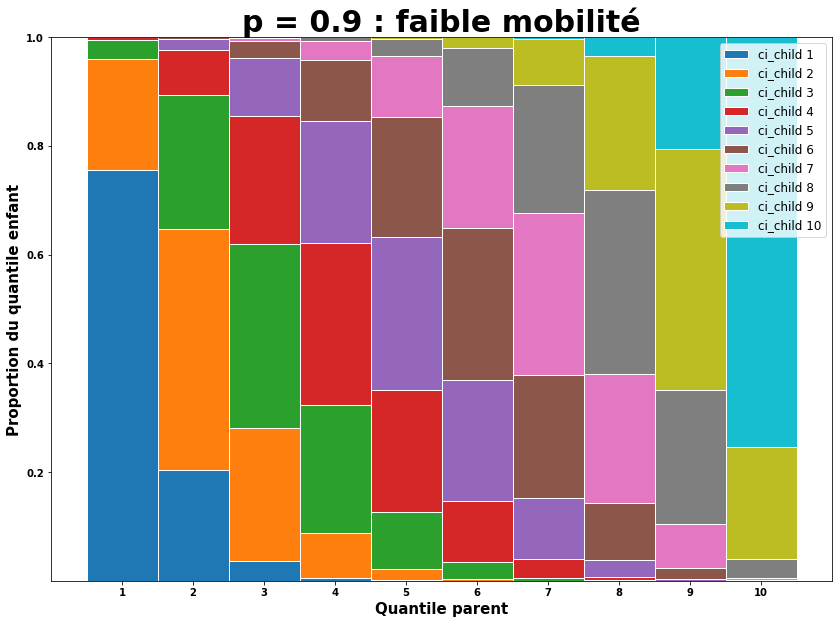

In [75]:
# Names of group and bar width
barWidth = 10
x = np.sort(simul.ci_parent.unique())
bars = np.zeros(len(x))

plt.figure(figsize=(14,10))

for k in proba_cond_child_09.ci_child_09.unique():
    y = proba_cond_child_09[proba_cond_child_09.ci_child_09 == k].sort_values("ci_parent").proba_cond_child_09.tolist()
    plt.bar(x,
            y,
            bottom = bars,
            edgecolor = 'white',
            width = 1,
            label = "ci_child " + str(k))
    
    bars = np.add(bars, y).tolist()
    
    
    # Custom X axis
plt.xlabel("Quantile parent", fontweight = "bold", fontsize = 15)
plt.ylabel("Proportion du quantile enfant", fontweight = "bold", fontsize = 15)
plt.title("p = 0.9 : faible mobilité", fontweight = "bold", fontsize = 30)
plt.xticks(x,fontweight = "bold", fontsize = 10)
plt.yticks(fontweight = "bold", fontsize = 10)
plt.legend(fontsize = 12)

plt.savefig(save + r"\03_pj_09.png")
# Show graphic
plt.show()

Avec un grand pj (0.9 ici) la probabilité qu'un enfant soit de même classe de revenu que ses parents est élevée. C'est donc la relation que l'on comprend dans l'équation suivante : <font size = 5>$y_{child} = e^{\alpha+\rho_jln(y_{parent})+\epsilon}$</font> <br>

Maintenant, je recalcule mes distributions conditionnelles avec un pj égal à 0.05.
### p=0.05

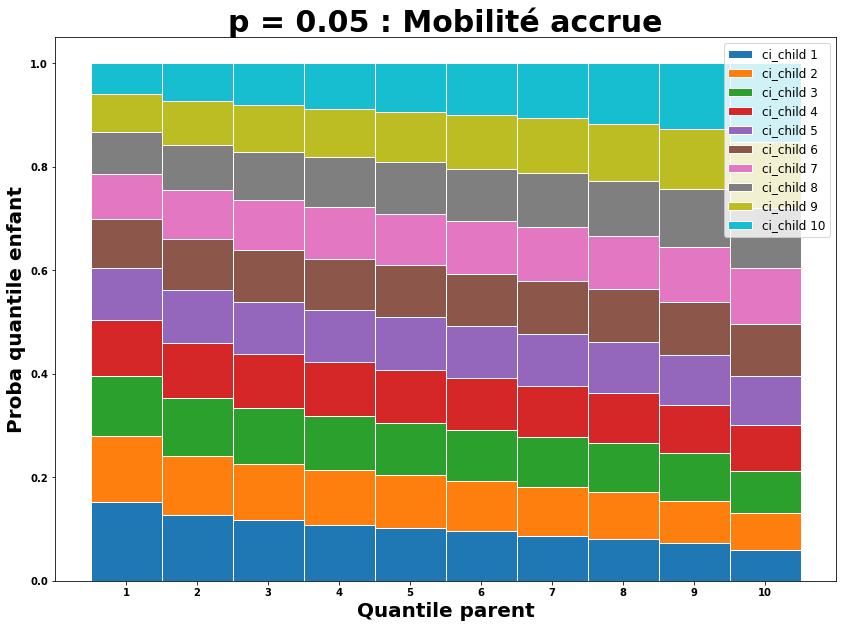

In [76]:
alpha = 0
pj = 0.05

# je recalcule mes y_child avec pj = 0.05
y_child = [math.exp(alpha + pj * x + y) for x,y in zip(ln_y_parent, epsilon)]
simul["y_child_005"] =  y_child
del y_child

# je refais un dico pour les y_child générés avec pj = 0.05
dico_child_005 = {a:int(b) for a,b in zip(np.sort(simul.y_child_005), np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size)-0.5+1/size) )}

# j'impute dans le df simul mes classes enfants avec pj = 0.05
simul["ci_child_005"] = simul["y_child_005"].map(dico_child_005)

# je libère de l'espace
del dico_child_005

# nous avons expliqué plus haut que les distributions conditionnelles des parents selon la classe enfant
# sont équivalentes aux distributions conditionnelles des enfants selon la classe parents
proba_cond_parent_005 = simul.groupby(["ci_child_005", "ci_parent"]).count()/simul.groupby(["ci_child_005", "ci_parent"]).count().groupby(level = 0).sum()
proba_cond_parent_005 = proba_cond_parent_005.reset_index().drop(["ln_y_parent", "epsilon", "y_child_005"], axis = 1)
proba_cond_parent_005.rename(columns = {"y_parent" : "proba_cond_parent_005"}, inplace = True)

for i in np.sort(simul.ci_child_005.unique()):
    for j in np.sort(simul.ci_parent.unique()):
        coucou = proba_cond_parent_005[(proba_cond_parent_005.ci_child_005 == i) & (proba_cond_parent_005.ci_parent == j)]
        if len(coucou) <= 0:
            proba_cond_parent_005 = proba_cond_parent_005.append(pd.DataFrame([i, j, 0],
                                                        index = ["ci_child_005", "c_100_parent", "proba_cond_parent_005"]).transpose(),
                                           )

# je libère de la mémoire
del coucou

# je ré-arrange mon df
proba_cond_parent_005 = proba_cond_parent_005.sort_values(["ci_child_005", "ci_parent"]).reset_index(drop = True)
proba_cond_parent_005

# je crée mon graphique
barWidth = 10
bars = np.zeros(len(x))

plt.figure(figsize=(14,10))

for k in proba_cond_parent_005.ci_child_005.unique():
    y = proba_cond_parent_005[proba_cond_parent_005.ci_child_005 == k].sort_values("ci_parent").proba_cond_parent_005.tolist()
    plt.bar(x,
            y,
            bottom = bars,
            edgecolor = 'white',
            width = 1,
            label = "ci_child "+ str(k))
    
    bars = np.add(bars, y).tolist()
    
    
# Custom X axis
plt.xlabel("Quantile parent", fontweight = "bold", fontsize = 20)
plt.ylabel("Proba quantile enfant", fontweight = "bold", fontsize = 20)
plt.title("p = 0.05 : Mobilité accrue", fontweight = "bold", fontsize = 30)
plt.xticks(x,fontweight = "bold", fontsize = 10)
plt.yticks(fontweight = "bold", fontsize = 10)
plt.legend(fontsize = 12)
plt.savefig(save + r"\03_pj_005.png")

# je libère de l'espace
del x, y, bars

# Show graphic
plt.show()

Avec un petit pj (0.05 ici) la probabilité qu'un enfant soit de même classe de revenu que ses parents est moins élevée.

<a id='M3P7'></a>
## Effacement individus

In [77]:
proba_cond_parent_09

,ci_child_09,ci_parent,proba_cond_parent_09
0,1,1,0.75487
1,1,2,0.20425
2,1,3,0.03555
3,1,4,0.00473
4,1,5,0.00057
...,...,...,...
95,10,6,0.00054
96,10,7,0.00423
97,10,8,0.03512
98,10,9,0.20545


<a id='M3P8'></a>
## Réplication des lignes de la WDI (x500)

In [78]:
%%time

data_new = pd.concat([data] * 500)

Wall time: 605 ms


<a id='M3P9'></a>
## Calcul des $c_{i,parents}$
__Méthode__<br>
mes colonnes income sont mes $y_{child}$. Je calcule, pour chaque pays selon son coefficient d'élasticité :
- $y_{parents}$
- les $c_{i,parents}$ associés


__Comment faire ?__
- Associer à chaque pays un pj spécifique récupéré sur le site de la WDI
- Créer une fonction qui à une distribution de $y_{child}$ donnés, à pj donné, calcule une table de $y_{parents}$ associés et donc de $c_{i,parents}$ associés.

### Importation des coefficients de mobilité proposés par la WDI
https://www.worldbank.org/en/topic/poverty/brief/what-is-the-global-database-on-intergenerational-mobility-gdim

In [79]:
# données relatives aux coefficients d'élasticité de 2018
data_wid = pd.read_csv(source + r"\GDIMMay2018.csv", sep = ",")

# les coef d'élasticité se trouvent dans la colonne IGEincome, la seule que je conserve dans ma table
# je prends les moyennes de tous mes coefficients existants
coef_pj = data_wid[data_wid.IGEincome.isna() == False].groupby('wbcode').mean()[["IGEincome"]]
coef_pj.reset_index(inplace = True)


# je renomme mes colonnes pour un merge plus efficace
coef_pj.columns = ["country", "p_j"]

# allure de mes coefs
coef_pj

,country,p_j
0,ALB,0.815874
1,AUS,0.275000
2,AUT,0.245267
3,BEL,0.183176
4,BEN,0.855116
...,...,...
70,USA,0.537666
71,UZB,0.496764
72,VNM,0.480000
73,ZAF,0.677000


In [80]:
# j'inclus mes coefficients pj dans ma table globale
data_new = data_new.merge(coef_pj,
                          how = "left",
                          on = "country")

data_new

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop,income_mean,gini,nb_gini_unique,Region,IncomeGroup,TableName,cluster_cah,cluster_km,p_j
0,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874
1,ALB,2008,2,100,916.66235,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874
2,ALB,2008,3,100,1010.91600,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874
3,ALB,2008,4,100,1086.90780,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874
4,ALB,2008,5,100,1132.69970,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799995,ZAF,2008,96,100,24553.56800,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000
5799996,ZAF,2008,97,100,28858.03100,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000
5799997,ZAF,2008,98,100,35750.29000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000
5799998,ZAF,2008,99,100,46297.31600,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000


Je vérifie que certains p_j ne sont pas en __NaN__

In [81]:
data_new[data_new.p_j.isna()]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop,income_mean,gini,nb_gini_unique,Region,IncomeGroup,TableName,cluster_cah,cluster_km,p_j
100,ARG,2008,1,100,254.08942,13220.0,40080160.0,5847.884654,44.9,23,Latin America & Caribbean,Upper middle income,Argentina,8,0,NaN
101,ARG,2008,2,100,470.50150,13220.0,40080160.0,5847.884654,44.9,23,Latin America & Caribbean,Upper middle income,Argentina,8,0,NaN
102,ARG,2008,3,100,623.45420,13220.0,40080160.0,5847.884654,44.9,23,Latin America & Caribbean,Upper middle income,Argentina,8,0,NaN
103,ARG,2008,4,100,734.97455,13220.0,40080160.0,5847.884654,44.9,23,Latin America & Caribbean,Upper middle income,Argentina,8,0,NaN
104,ARG,2008,5,100,832.31850,13220.0,40080160.0,5847.884654,44.9,23,Latin America & Caribbean,Upper middle income,Argentina,8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799895,YEM,2008,96,100,2568.65110,2224.0,21892146.0,1042.635870,34.7,2,Middle East & North Africa,Low income,"Yemen, Rep.",6,2,NaN
5799896,YEM,2008,97,100,2893.90400,2224.0,21892146.0,1042.635870,34.7,2,Middle East & North Africa,Low income,"Yemen, Rep.",6,2,NaN
5799897,YEM,2008,98,100,3307.27220,2224.0,21892146.0,1042.635870,34.7,2,Middle East & North Africa,Low income,"Yemen, Rep.",6,2,NaN
5799898,YEM,2008,99,100,4137.02640,2224.0,21892146.0,1042.635870,34.7,2,Middle East & North Africa,Low income,"Yemen, Rep.",6,2,NaN


Je vais donc imputer, pour chacun de ces pays, les coefficients de mobilité proposés par Openclassrooms

In [82]:
data_new[data_new.p_j.isna()].TableName.unique()

array(['Argentina', 'Armenia', 'Azerbaijan', 'Burkina Faso', 'Bulgaria',
       'Bhutan', 'Central African Republic', "Côte d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Costa Rica', 'Dominican Republic', 'Estonia',
       'Fiji', 'Georgia', 'Honduras', 'Hungary', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Iceland', 'Israel', 'Cambodia',
       'Lao PDR', 'Liberia', 'Sri Lanka', 'Lithuania', 'Moldova',
       'Mexico', 'Montenegro', 'Mozambique', 'Mauritania', 'Niger',
       'Nicaragua', 'Philippines', 'Poland', 'Paraguay',
       'West Bank and Gaza', 'Romania', 'Sudan', 'El Salvador', 'Serbia',
       'Eswatini', 'Syrian Arab Republic', 'Thailand', 'Tajikistan',
       'Timor-Leste', 'Turkey', 'Ukraine', 'Uruguay', 'Venezuela, RB',
       'Kosovo', 'Yemen, Rep.'], dtype=object)

### Téléchargement des pj manquants

Dans les régions du df __data_new__, j'associe les pj base case :
- 'Europe & Central Asia': 0.4
- 'Latin America & Caribbean': 0.66
- 'Sub-Saharan Africa' : 0.66
- 'South Asia' : 0.5
- 'North America' : 0.3 (il y a le Canada et les USA : 0.3 de moyenne)
- 'East Asia & Pacific' : 0.5
- 'Middle East & North Africa' : 0.66

Je stocke donc ces données dans un dictionnaire appelé __dico_pj__. J'applique ensuite à toutes les lignes une équivalence incluse dans mon dictionnaire.

### Dico des pj

In [83]:
# dico_pj associant à une zone un pj
dico_pj = dict(zip(data.Region.unique(), [0.4, 0.66, 0.66, 0.5, 0.3, 0.5, 0.66]))

# je remplace tous les p_j en NaN par le pj de sa zone géographique
data_new.loc[data_new[data_new.p_j.isna()].index,"p_j"] = data_new.loc[data_new[data_new.p_j.isna()].index, "Region"].map(dico_pj)

# je supprime mon dico_pj
del dico_pj

### Calcul des $c_{i,parents}$

__Méthode__
- je trie mon df en fonction du pays et de ses quantiles pour une meilleure visibilité
- je calcule les y_parents
- grâce à un dico, j'associe un centile à chaque y_parent
- je crée une colonne ci_parents avec les centiles parents associés à chaque y_child 

In [84]:
# je réordonne mon df selon les pays et les quantiles associés
data_new = data_new.sort_values(["country", "quantile"]).reset_index(drop = True)

data_new

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop,income_mean,gini,nb_gini_unique,Region,IncomeGroup,TableName,cluster_cah,cluster_km,p_j
0,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874
1,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874
2,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874
3,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874
4,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799995,ZAF,2008,100,100,82408.55000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000
5799996,ZAF,2008,100,100,82408.55000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000
5799997,ZAF,2008,100,100,82408.55000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000
5799998,ZAF,2008,100,100,82408.55000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000


<font size = 7>$y_{child} = e^{\alpha+\rho_jln(y_{parent})+\epsilon}$<br>
$\implies \ \ y_{parents} = e^{(\frac{ln(y_{child}) -\ \alpha -\  \epsilon}{p_j})}    $ </font>.

In [85]:
import math

def c_i_parents(y_child, pj, alpha=0, nb_quantiles=100):
    
    # taille de l'échantillon
    size = y_child.shape[0]
        
    # je stocke mes y_child dans un df
    simul = pd.DataFrame(y_child).rename(columns = {"income" : "y_child"})
    
    # Je calcule mes epsilon
    epsilon = np.random.randn(len(y_child))
    
    # je calcule mes y_parents
    y_parents = [math.exp((math.log(x) - alpha - y)/pj) for x,y in zip(y_child,epsilon)]
        
    # j'associe en dico mes ci_parents
    dico_parents = {a:int(b) for a,b in zip(np.sort(y_parents), np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size)-0.5+1/size))}
    
    # je retourne en liste mes ci_parents
    return [dico_parents[x] for x in y_parents]

In [86]:
# je refais un dico avec les pj
dico_pj = {x:y for x,y in zip(data_new[["country", "p_j"]].drop_duplicates().country,
                              data_new[["country", "p_j"]].drop_duplicates().p_j)}

In [87]:
%%time
centile_parents = np.array([], dtype = int)
for k in data_new.country.unique():
    centile_parents = np.append(centile_parents,
                                c_i_parents(data_new[data_new.country == k].income, dico_pj[k], alpha = 2),
                                axis = 0
                               )
centile_parents

Wall time: 42 s


array([17,  2, 22, ..., 99, 88, 98])

Le time est satisfaisant en passant par numpy et les listes. Je pose maintenant ma liste dans un dataframe que j'ajoute à __data_new__.

In [88]:
data_new["ci_parents"] = centile_parents
del centile_parents
data_new

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop,income_mean,gini,nb_gini_unique,Region,IncomeGroup,TableName,cluster_cah,cluster_km,p_j,ci_parents
0,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874,17
1,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874,2
2,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874,22
3,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874,41
4,ALB,2008,1,100,728.89795,7297.0,2947314.0,2994.829902,30.0,4,Europe & Central Asia,Upper middle income,Albania,6,2,0.815874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799995,ZAF,2008,100,100,82408.55000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000,98
5799996,ZAF,2008,100,100,82408.55000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000,100
5799997,ZAF,2008,100,100,82408.55000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000,99
5799998,ZAF,2008,100,100,82408.55000,9602.0,49779472.0,5617.904880,63.0,6,Sub-Saharan Africa,Upper middle income,South Africa,9,0,0.677000,88


Nous avons recalculé, en fonction du coefficient de mobilité (élasticité) de chaque pays, les classifications parents probables en fonction des income des y_child.<br>

<a id='M3P10'></a>
## Présence de $m_j$ et $G_j$
Pour chaque pays et chaque individu j'ai : 
- $m_j$ : data_new.income_mean
- $G_j$ : data_new.gini
- $c_{i,parents}$ : data_new.ci_parents

Maintenant, l'objectif est de comprendre : 
- La significativité de la différence des revenus entre les différents pays
- Quelles sont les variables explicatives du champs valeur __income__ parmi
 - income_mean
 - indice de gini
 - classification parents

<a id='M4'></a>
# Mission 04
Nous allons réaliser plusieurs tests :
- ANOVA
- Regression linéaire : expliquer l'income avec l'income moyen et le gini
- Régression linéaire : expliquer l'income avec l'income moyen, le gini et la classification parents

__Etape intermédiaire__
Je transforme les colonnes numériques en integers
J'échantillonne ma base avec un certain nombre de lignes représentatives pour en tirer des conclusions statistiques.

In [89]:
data_new.ci_parents = pd.to_numeric(data_new.ci_parents)
data_new["ln_income"] = data_new["income"].apply(math.log)
data_new["ln_income_mean"] = data_new["income_mean"].apply(math.log)
data_new["ln_gdpppp"] = data_new["gdpppp"].apply(math.log)
data_new["ln_gini"] = data_new["gini"].apply(math.log)
data_new["ln_p_j"] = data_new["p_j"].apply(math.log)
data_new["ln_ci_parents"] = data_new["ci_parents"].apply(math.log)

Je choisis une taille d'échantillon me permettant de faire mes tests avec suffisamment de lignes.<br>
Mon df global fait 5.8m de lignes. J'en choisis 1% : 58 000. Cela semble suffisant pour tester.<br>
Le choix des lignes est fait de manière aléatoire avec train_test_split de scikit learn.

In [90]:
from sklearn.model_selection import train_test_split

# je choisis 99% pour la size test et 1% pour la size train sur laquelle je vais faire mes modèles
data_train, data_test = train_test_split(data_new, test_size= 0.99)

# allure de mon échantillon test
data_train

,country,year_survey,quantile,nb_quantiles,income,gdpppp,2008_pop,income_mean,gini,nb_gini_unique,Region,IncomeGroup,TableName,cluster_cah,cluster_km,p_j,ci_parents,ln_income,ln_income_mean,ln_gdpppp,ln_gini,ln_p_j,ln_ci_parents
1392483,DOM,2008,85,100,5288.38530,7505.0000,9458075.0,3558.402105,48.1,13,Latin America & Caribbean,Upper middle income,Dominican Republic,8,0,0.660000,96,8.573268,8.177067,8.923325,3.873282,-0.415515,4.564348
1873374,GHA,2006,47,100,507.48610,1380.1182,23563825.0,736.602529,42.8,5,Sub-Saharan Africa,Lower middle income,Ghana,4,2,0.561605,44,6.229469,6.602048,7.229924,3.756538,-0.576957,3.784190
1198044,CYP,2008,97,100,37639.85000,26273.0000,1081563.0,17345.387463,31.7,7,Europe & Central Asia,High income,Cyprus,2,1,0.342000,100,10.535819,9.761082,10.176297,3.456317,-1.072945,4.605170
2807457,KGZ,2008,15,100,745.03064,2043.0000,5318700.0,1773.219217,31.5,12,Europe & Central Asia,Lower middle income,Kyrgyz Republic,5,2,0.352871,7,6.613425,7.480552,7.622175,3.449988,-1.041652,1.945910
1947450,GIN,2007,95,100,1743.55700,977.0000,9738792.0,696.012013,39.4,4,Sub-Saharan Africa,Low income,Guinea,4,2,0.342855,86,7.463683,6.545367,6.884487,3.673766,-1.070449,4.454347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3409948,MEX,2008,20,100,1164.67850,13434.0000,110815271.0,3885.830277,49.9,10,Latin America & Caribbean,Upper middle income,Mexico,8,0,0.660000,79,7.060200,8.265092,9.505544,3.910021,-0.415515,4.369448
2395746,IRN,2008,92,100,12068.06500,10446.0000,72120604.0,5832.655501,44.8,6,Middle East & North Africa,Upper middle income,"Iran, Islamic Rep.",7,2,0.660000,74,9.398318,8.671228,9.253974,3.802208,-0.415515,4.304065
172642,AUT,2008,46,100,13926.49900,36193.0000,8321496.0,16637.600204,30.4,14,Europe & Central Asia,High income,Austria,2,1,0.245267,52,9.541549,9.719420,10.496621,3.414443,-1.405409,3.951244
3254837,MAR,2007,10,100,777.34810,3973.0000,31536811.0,2337.600601,40.7,4,Middle East & North Africa,Lower middle income,Morocco,4,2,0.945744,3,6.655888,7.756880,8.287277,3.706228,-0.055783,1.098612


<a id='M4P1'></a>
## ANOVA à un facteur
Afin de tester avec ANOVA l'égalité de mes revenus en fonction de mes pays, je dois vérifier les hypothèses suivantes :
- normalité des income
- normalité des résidus
- homoscédasticité des résidus
- indépendance des sous-échantillons (des revenus en fonction des pays)

Je débute par ce que je peux déjà tester
### Kolmogorov-Smirnov sur la normalité des incomes de l'échantillon
Rappel du test : $\begin{cases} 
H_0 : F_{train} = F_{normal}
\\
H_1 : F_{train} \neq F_{normal}
\end{cases}$

In [91]:
st.ks_2samp(data_train.income, np.random.normal(data_train.income.mean(), data_train.income.std(ddof = 0), len(data_train)))

KstestResult(statistic=0.2634310344827586, pvalue=0.0)

Avec une p-value égale à zéro je rejette l'hypothèse de normalité de mon échantillon $H_0$.<br>
Pour autant, compte-tenu de la taille de l'échantillon et de la base de données, avec la loi faible des grands nombres, ma série converge en probabilité vers une loi normale. <br>

Je procède maintenant à un test ANOVA sur les différents pays de mon échantillon, pour répondre à la question suivante :<br>
__Les revenus moyens des pays sont-ils égaux entre eux ?__<br>
Les graphiques plus hauts nous amènent à penser que les niveaux de revenus sont différents. Voyons si l'__ANOVA__ confirme cette tendance.

<a id='M4P2'></a>
## ANOVA des income

### Vue des pays

In [92]:
import statsmodels.formula.api as smf
anova_pays = smf.ols('income~TableName', data=data_train).fit()
print(anova_pays.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     503.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:00:50   Log-Likelihood:            -5.9370e+05
No. Observations:               58000   AIC:                         1.188e+06
Df Residuals:                   57884   BIC:                         1.189e+06
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Vue globale

In [93]:
import statsmodels.api as sm

anova_1 = sm.stats.anova_lm(anova_pays, typ=2)
anova_1["eta_square"] = ["{:,.2%}".format(anova_1.sum_sq[0]/anova_1.sum_sq.sum()), "NaN"]
anova_1

,sum_sq,df,F,PR(>F),eta_square
TableName,2.643746e+12,115.0,503.595294,0.0,50.01%
Residual,2.642401e+12,57884.0,NaN,NaN,NaN


D'après notre modèle, la p-value globale est égale à zero avec des statistiques de Fisher supérieures à 100. Nous rejetons donc $H_0$, à savoir la nullité des $\alpha_{i}$ ou bien l'égalité des revenus moyens pour chaque pays. Dans notre échantillon, les revenus moyens par habitants sont donc différents selon les pays, excepté pour l'Azerbaidjan, la Bolivie, la Chine, la Colombie, la République Dominicaine, l'Equateur, le Salvador, le Guatemala, le Honduras, la Jordanie,, le Khazakhstan, le Kosovo,la Mongolie, la Moldavie, le Maroc, le Nicaragua, le Paraguay, le Pérou, la Roumanie, la Thaïlande, l'Ukraine et le Venezuela (20 / 116 pays), dont les p-values sont supérieures à 5%. Toujours dans notre échantillon, pour ces pays là, les revenus moyens sont statistiquement très proches du revenu moyen global. 

À présent, je retire de mon test ces pays non-significatifs pour observer si une amélioration du modèle s'opère.
### Suppression des pays non-significatifs

In [94]:
backwardation = ["Azerbaijan", "Bolivia", "China", "Colombia", "Dominican Republic", "Ecuador", "El Salvador","Guatemala", "Honduras","Jordan","Kazakhstan","Kosovo",
                 "Moldova", "Mongolia","Morocco","Nicaragua","Paraguay","Peru", "Romania","Tajikistan","Thailand", "Ukraine","Venezuela, RB"]
print(smf.ols('income~TableName', data=data_train[data_train.TableName.isin(backwardation) == False]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     497.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:00:51   Log-Likelihood:            -4.7928e+05
No. Observations:               46429   AIC:                         9.588e+05
Df Residuals:                   46336   BIC:                         9.596e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Mêmes commentaires, en enlevant cette fois-ci le Belarus

In [95]:
backwardation.append("Belarus")
print(smf.ols('income~TableName', data=data_train[data_train.TableName.isin(backwardation) == False]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     495.7
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:00:51   Log-Likelihood:            -4.7361e+05
No. Observations:               45854   AIC:                         9.474e+05
Df Residuals:                   45762   BIC:                         9.482e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Par ailleurs, nous avons ici un $R²$ de 49.9%, descendu à 49.5%. Considérant $R² = \frac{SCE}{SCT}$, notre modèle n'explique que quasiment la moitié de la variance.<br>

Cela soulève une question : ces pays sont-ils non-significatifs à cause de l'échantillonnage ou bien parce que leurs revenus moyens sont sensiblement proches du revenu moyen global ?


Je souhaite maintenant vérifier les hypothèses de l'ANOVA, afin de valider les 49.9% d'explication des écarts :
- normalité de l'échantillon (test de Kolmogorov-Smirnov, $H_0$ : normalité de la distribution)
- indépendance des variables (test de colinéarité approchée des variables avec variance_inflation_factor <= 10)
- normalité des résidus (Kolmogorov-Smirnov, $H_0$ : normalité de la distribution)
- homoscédasticité des résidus des sous-échantillons (variances égales des résidus des sous-échantillons : test de Breusch Pagan, $H_0$ : variances constantes)

### Normalité des income

In [96]:
# normalité des revenus
print(st.ks_2samp(data_train.income, np.random.normal(data_train.income.mean(), data_train.income.std(ddof = 0), len(data_train))))

KstestResult(statistic=0.26289655172413795, pvalue=0.0)


### Normalité des résidus

In [97]:
# normalité des résidus
st.ks_2samp(anova_pays.resid, np.random.normal(anova_pays.resid.mean(), anova_pays.resid.std(ddof = 0), len(anova_pays.resid)))

KstestResult(statistic=0.24829310344827593, pvalue=0.0)

Avec une p-value égale à zéro je rejette l'hypothèse de normalité de mes résidus ($H_0$).<br>
Je fais maintenant le test de Breusch-Pagan sur l'homoscédasticité des revenus de mes différents pays.<br>
Le test se décline comme suit : $\begin{cases}
H_{0} : \forall j \in [|0, 116|] \ \sigma^{2}_{j} (résidus) = \sigma^{2}_{échantillon} (résidus) \\
H_{1} : \exists \ i\  tel \ que, \forall j \neq i \in [|0, 116|] \ \sigma^{2}_{i} \neq \sigma^{2}_{j}
\end{cases}$<br>

### Homoscédasticité des résidus

In [98]:
import statsmodels
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(anova_pays.resid, anova_pays.model.exog)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


Avec une p-value inférieure à 5%, je rejette $H_0$. Mes résidus ne sont pas homoscédastiques. Mon __ANOVA__ ne valide pas l'hypothèse d'homoscédasticité.<br>


Nous procédons au test de colinéarité rapprochée entre mes différents pays. Si mes indices sont suppérieurs à cinq, j'estime qu'il y a une colinéarité rapprochée entre les résidus et la variables explicative exogène. S'il y a colinéarité rapprochée, alors il y a dépendance. 

### Indépendance entre variables exogènes et erreurs

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col = [variance_inflation_factor(anova_pays.model.exog, i) for i in np.arange(1,anova_pays.model.exog.shape[1])]
print(col)

[1.9152523974699032, 1.963307216214378, 1.9306345643746186, 1.942168332993267, 1.9325570291777183, 2.1129650411480645, 1.9190983472760668, 2.01515867510032, 1.9440903897163841, 1.9633072162143776, 2.020916887709991, 1.970992042440318, 1.9748340474733048, 1.972913078963477, 1.9844378698224854, 2.0093998503706736, 1.9652285247908587, 1.9959602122015916, 1.9440903897163846, 1.9748340474733053, 2.00556029381759, 1.9152523974699032, 2.007480106100797, 1.967149765354008, 1.9825172413793113, 1.926789430728423, 1.9748340474733053, 2.024755356049784, 1.980596544922805, 1.882550839964634, 1.9978803645514533, 1.995960212201592, 1.89794225668231, 1.8729289940828409, 1.9306345643746186, 1.9536996531320137, 1.926789430728423, 1.8767779364755484, 1.9190983472760668, 1.8863991022240367, 1.9671497653540084, 2.0420250969189957, 1.9267894307284235, 1.9498561518057538, 2.022836155886554, 1.9921197034618787, 2.055453308848535, 1.9805965449228045, 1.921021220159152, 1.8787023056519074, 1.9575428824049501, 1

Aucune de mes valeur est supérieure à 5. Les différents income par pays ne présentent pas de colinéarité rapprochée avec les résidus. Ja valide leur indépendance.<br>
<br>
<br>

J'en déduis ici que les hypothèses de mes tests ANOVA ne sont __pas validées__.<br>
Pour autant, compte-tenu de la grandeur de l'échantillon et de la base de données, ce test nous donne une tendance globale déjà anticipée : les pays ont des structures de revenus différentes. Cette réalité est visibles dans les différentes économies réelles.

Je souhaite maintenat faire le même test avec les log-revenus pour améliorer mon modèle. 

<a id='M4P3'></a>
## ANOVA des log-income

In [100]:
anova_pays_ln = smf.ols('ln_income~TableName', data=data_train).fit()
print(anova_pays_ln.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1368.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:01:42   Log-Likelihood:                -63098.
No. Observations:               58000   AIC:                         1.264e+05
Df Residuals:                   57884   BIC:                         1.275e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [101]:
anova_ln = sm.stats.anova_lm(smf.ols('ln_income~TableName', data=data_train).fit(), typ=2)
anova_ln["eta_square"] = ["{:,.2%}".format(anova_ln.sum_sq[0]/anova_ln.sum_sq.sum()), "NaN"]
anova_ln

,sum_sq,df,F,PR(>F),eta_square
TableName,81293.525966,115.0,1367.794719,0.0,73.10%
Residual,29915.463255,57884.0,NaN,NaN,NaN


### Suppression des pays non-significatifs

In [102]:
ln_backwardation = ["Jordan", "Mexico", "Romania", "South Africa" ]
print(smf.ols('ln_income~TableName', data=data_train[data_train.TableName.isin(ln_backwardation) == False]).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1451.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:01:43   Log-Likelihood:                -60257.
No. Observations:               56008   AIC:                         1.207e+05
Df Residuals:                   55896   BIC:                         1.217e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Cette fois-ci, mon modèle semble plus explicatif en considérant le logarithme des revenus. Pourquoi ?

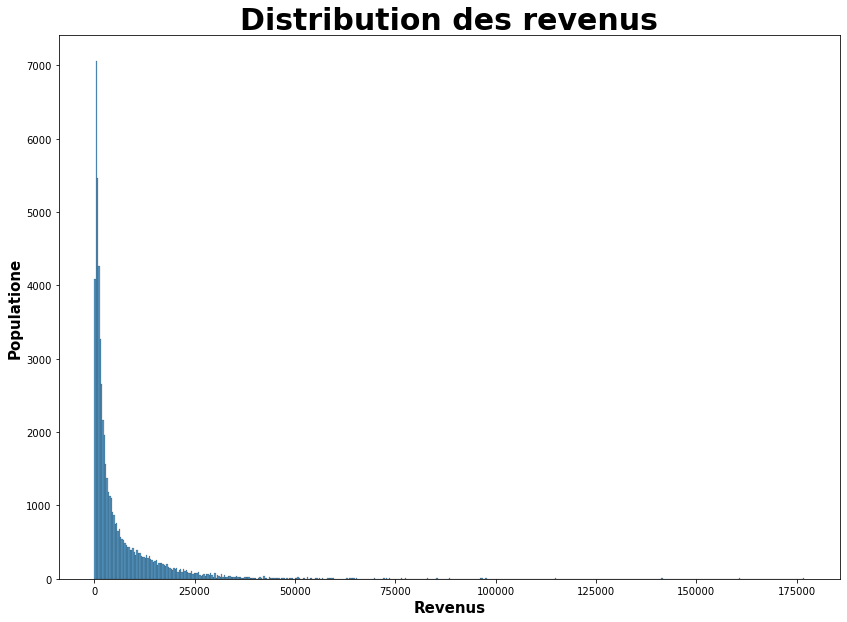

In [103]:
plt.figure(figsize = (14,10))
sns.histplot(data_train.income)
plt.title("Distribution des revenus" , fontsize = 30, fontweight = "bold")
plt.xlabel("Revenus", fontsize = 15, fontweight = "bold")
plt.ylabel("Populatione", fontsize = 15, fontweight = "bold")
plt.savefig(save + r"\04_hist_revenus.png")
plt.show()

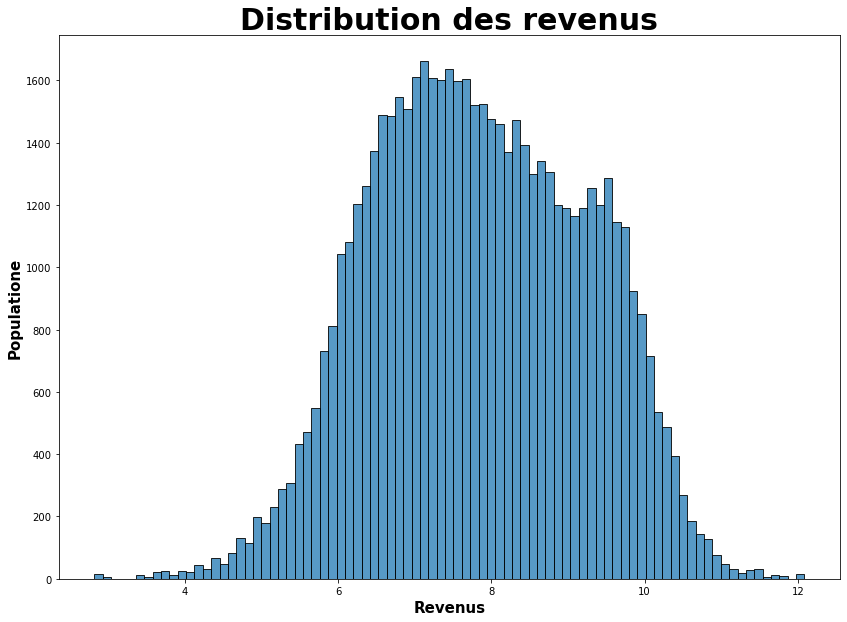

In [104]:
plt.figure(figsize = (14,10))
sns.histplot(data_train.ln_income)
plt.title("Distribution des log-revenus" , fontsize = 30, fontweight = "bold")
plt.xlabel("Revenus", fontsize = 15, fontweight = "bold")
plt.ylabel("Populatione", fontsize = 15, fontweight = "bold")
plt.savefig(save + r"\04_hist_revenus_log.png")
plt.show()

En passant les revenus sous logarithme, mes données semblent davantage ordonnées selon une loi normale. Voyons si le test de normalité de Kolmogorov Smirnov valide cette intuition ?

### Normalité des log-income

In [105]:
# normalité des log-revenus
print(st.ks_2samp(data_train.ln_income, np.random.normal(data_train.ln_income.mean(), data_train.ln_income.std(ddof = 0), len(data_train))))

KstestResult(statistic=0.03281034482758627, pvalue=1.4747828193360859e-27)


Avec une p-value inférieure à 5%, je rejette l'hypothèse de normalité de mes log-income. Pour autant, compte-tenu de la nette amélioration du modèle, je déduis que mes log-income sont davantage différents en fonction de mes différents pays.

### Normalité des résidus

In [106]:
st.ks_2samp(anova_pays_ln.resid, np.random.normal(anova_pays_ln.resid.mean(), anova_pays_ln.resid.std(ddof = 0), len(anova_pays_ln.resid)))

KstestResult(statistic=0.0366206896551724, pvalue=3.163473784827169e-34)

Mes résidus ne sont pas normaux avec une p-value inférieure à 5%, je rejette cette hypothèse.

### Homoscédasticité des résidus

In [107]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(anova_pays_ln.resid, anova_pays_ln.model.exog)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


Mes résidus ne sont pas homoscédastiques, je rejette cette hypothèse avec une p-value inférieure à 5%

### Indépendance entre variables exogènes et erreurs

In [108]:
col_ln = [variance_inflation_factor(anova_pays_ln.model.exog, i) for i in np.arange(1,anova_pays_ln.model.exog.shape[1])]
print(col_ln)

[1.9152523974699032, 1.963307216214378, 1.9306345643746186, 1.942168332993267, 1.9325570291777183, 2.1129650411480645, 1.9190983472760668, 2.01515867510032, 1.9440903897163841, 1.9633072162143776, 2.020916887709991, 1.970992042440318, 1.9748340474733048, 1.972913078963477, 1.9844378698224854, 2.0093998503706736, 1.9652285247908587, 1.9959602122015916, 1.9440903897163846, 1.9748340474733053, 2.00556029381759, 1.9152523974699032, 2.007480106100797, 1.967149765354008, 1.9825172413793113, 1.926789430728423, 1.9748340474733053, 2.024755356049784, 1.980596544922805, 1.882550839964634, 1.9978803645514533, 1.995960212201592, 1.89794225668231, 1.8729289940828409, 1.9306345643746186, 1.9536996531320137, 1.926789430728423, 1.8767779364755484, 1.9190983472760668, 1.8863991022240367, 1.9671497653540084, 2.0420250969189957, 1.9267894307284235, 1.9498561518057538, 2.022836155886554, 1.9921197034618787, 2.055453308848535, 1.9805965449228045, 1.921021220159152, 1.8787023056519074, 1.9575428824049501, 1

Avec des indices inférieurs à 5, je déduis que mes erreurs sont indépendantes de mes sous-échantillons de log-income (ne présentent pas de colinéarité rapprochée).<br>

Malgré la non-validation des hypothèses, l'ANOVA des log-income nous donne la même intuition que l'ANOVA des income (avec un eta² plus explicatif certes) : les revenus moyens et les distribution de revenus varient en fonction des pays.<br>


À présent, je souhaite comprendre les facteurs expliquant mes revenus tous pays confondus.<br>
Je procède par des __régressions linéaires multiples__ pour comprendre lesquels sont les plus déterminants.

Les hypothèses à vérifier sur mes régressions linéaires :
- H1 : Le modèle est bien spécifié en moyenne
- H2 : Homoscédasticité des erreurs (variance constante)
- H3 : Pas d'autocorrélation des erreurs.
- H4 : Les erreurs sont linéairement indépendantes des variables exogènes.
- H5 : Les erreurs suivent une loi normale.

<a id='M4P4'></a>
## Régression income = gdpppp + gini

### Normalité des variables explicatives

In [109]:
# normalité des Ginis
print(st.ks_2samp(data_train.gini, np.random.normal(data_train.gini.mean(), data_train.gini.std(ddof = 0), len(data_train))))

# normalité des revenus moyens
print(st.ks_2samp(data_train.income_mean, np.random.normal(data_train.income_mean.mean(), data_train.income_mean.std(ddof = 0), len(data_train))))

# normalité des classes de revenus des parents
print(st.ks_2samp(data_train.ci_parents, np.random.normal(data_train.ci_parents.mean(), data_train.ci_parents.std(ddof = 0), len(data_train))))

KstestResult(statistic=0.12205172413793097, pvalue=0.0)
KstestResult(statistic=0.20701724137931038, pvalue=0.0)
KstestResult(statistic=0.06682758620689655, pvalue=4.7647093699104676e-113)


Mes indices de Gini, mes revenus moyens et mes classifications parents ne sont pas normales.<br>
Je ne valide donc pas mes premières hypothèses pour procéder à des régressions linéaires. Pour autant, je teste mes régressions pour comprendre si quelques tendances se présentent parmi mes données.

<a id='M4P5'></a>
### Régression sans log

In [110]:
reg_inc = smf.ols('income~income_mean+gini', data=data_train).fit()
print(reg_inc.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 2.890e+04
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:34   Log-Likelihood:            -5.9376e+05
No. Observations:               58000   AIC:                         1.188e+06
Df Residuals:                   57997   BIC:                         1.188e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -21.3211    152.785     -0.140      

Toutes mes variables ne sont pas significatives : l'intercept et surtout l'indice de gini ont une p-value supérieure à 5%. Leur coef n'est donc pas significatif. Par ailleurs R² de 49.8%, je souhaite améliorer mon modèle. Je cherche des variables significatives.

<a id='M4P6'></a>
### Régression avec log

In [111]:
reg_inc_ln = smf.ols('ln_income~ln_income_mean+ln_gini', data=data_train).fit()
print(reg_inc_ln.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 7.756e+04
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:34   Log-Likelihood:                -63436.
No. Observations:               58000   AIC:                         1.269e+05
Df Residuals:                   57997   BIC:                         1.269e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.2186      0.065     34.

Ici mes log-variables sont toutes significatives avec des p-values inférieures à 5%. Elles sont donc explicatives avec un R² 72.7% cette fois-ci. Ce modèle est plus complet que le premier. Par ailleurs, avec un coefficient de Durbin-Watson proche de 2, nous pouvons constater une absence ou une très faible autocorrélation des résidus, validant une des hypothèses de la régression linéaire. 
#### Normalité des résidus

In [112]:
st.ks_2samp(reg_inc_ln.resid, np.random.normal(reg_inc_ln.resid.mean(), reg_inc_ln.resid.std(ddof = 0), len(anova_pays_ln.resid)))

KstestResult(statistic=0.03667241379310346, pvalue=2.5386366648786494e-34)

Avec une p-value proche de zéro je rejette l'hypothèse de normalité de mes résidus ($H_0$).<br>
Je fais maintenant le test de Breusch-Pagan sur l'homoscédasticité des revenus de mes différents pays.<br>
Le test se décline comme suit : $\begin{cases}
H_{0} : \forall j \in [|0, 116|] \ \sigma^{2}_{j} (résidus) = \sigma^{2}_{échantillon} (résidus) \\
H_{1} : \exists \ i\neq j \  tel \ que, \forall j \in [|0, 116|] \ \sigma^{2}_{i} \neq \sigma^{2}_{j}
\end{cases}$<br>

#### Homoscédasticité des résidus

In [113]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_inc_ln.resid, reg_inc_ln.model.exog)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


Mes résidus ne sont pas homoscédastiques, je rejette cette hypothèse avec une p-value inférieure à 5%

#### Indépendance entre variables exogènes et erreurs

In [114]:
col_reg_inc_ln = [variance_inflation_factor(reg_inc_ln.model.exog, i) for i in np.arange(1,reg_inc_ln.model.exog.shape[1])]
print(col_reg_inc_ln)

[1.1024546514136806, 1.1024546514136835]


In [115]:
# je confirme avec pearsonr si j'ai bien une absence de correl
from scipy.stats import pearsonr as pea

print(pea(data_train.ln_income_mean, reg_inc_ln.resid)[0])
print(pea(data_train.ln_gini, reg_inc_ln.resid)[0])

-6.487215278849767e-15
5.976556055609095e-15


Avec des indices inférieurs à 5, je déduis que mes erreurs sont indépendantes des log-income_mean et les log-gini. C'est confirmé par des corrélations entre les résidus et les variables explicatibes très proches de zero.<br>
### Conclusion de la log-régression
Malgré la non-validation des hypothèses de résidus, ce modèle explique à 72.7% les revenus enfants par les gini des pays dans lesquels ils se trouvent et le revenu moyen du pays, comme intuité dans la seconde partie de ce notebook.<br>

## Conclusions du modèle
Compte-tenu des coefficients associés aux log-income_mean et log-gini, plus le niveau de revenu du pays moyen augmente, plus les chances d'avoir un haut revenu de mes prospects augmentent. Au même titre, plus le gini d'un pays augmente, plus les revenus ont tendance à diminuer, plus les chances d'avoir un haut revenu de mes prospects diminuent.<br>
Nous notons ici la différence de poids entre ln_income_mean et ln_gini. Les income sont sensiblement plus grands que les gini dans leur ordre de grandeur. Par conséquent, le principal facteur ici demeurent les niveaux de revenus moyens.

In [116]:
reg_inc_ln.params

Intercept         2.218579
ln_income_mean    0.987825
ln_gini          -0.661192
dtype: float64

Je souhaite maintenant améliorer mon modèle en rajoutant comme variable explicative la classification parents.

<a id='M4P7'></a>
## Régression : income = gdpppp + gini + $c_{i}(parents)$

<a id='M4P8'></a>
### Régression sans log

In [117]:
reg_new = smf.ols('income~income_mean+gini+ci_parents', data=data_train).fit()
print(reg_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                 2.330e+04
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:34   Log-Likelihood:            -5.9087e+05
No. Observations:               58000   AIC:                         1.182e+06
Df Residuals:                   57996   BIC:                         1.182e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3717.2247    152.925    -24.307      

Toutes mes variables ne sont pas significatives : L'indice de gini a une p-value supérieure à 5%. Son coef n'est donc pas significatif. Par ailleurs avec un R² de 52.8%, je souhaite améliorer mon modèle. Je cherche des variables significatives.

<a id='M4P9'></a>
### Régression avec log

In [118]:
reg_new_log = smf.ols('ln_income~ln_income_mean+ln_gini+ln_ci_parents', data=data_train).fit()
print(reg_new_log.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 7.701e+04
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:34   Log-Likelihood:                -54597.
No. Observations:               58000   AIC:                         1.092e+05
Df Residuals:                   57996   BIC:                         1.092e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7581      0.057     13.

Ici mes log-variables sont toutes significatives avec des p-values inférieures à 5%. Elles sont donc explicatives avec un R² 79.9% cette fois-ci. Ce modèle est plus complet que le premier. Par ailleurs, avec un coefficient de Durbin-Watson proche de 2, nous pouvons constater une absence ou une très faible autocorrélation des résidus, validant une des hypothèses de la régression linéaire.

#### Normalité des résidus

In [119]:
st.ks_2samp(reg_new_log.resid, np.random.normal(reg_new_log.resid.mean(), reg_new_log.resid.std(ddof = 0), len(reg_new_log.resid)))

KstestResult(statistic=0.023758620689655174, pvalue=1.1856133292440955e-14)

Avec une p-value proche de zéro je rejette l'hypothèse de normalité de mes résidus ($H_0$).<br>
Je fais maintenant le test de Breusch-Pagan sur l'homoscédasticité des revenus de mes différents pays.<br>
Le test se décline comme suit : $\begin{cases}
H_{0} : \forall j \in [|0, 116|] \ \sigma^{2}_{j} (résidus) = \sigma^{2}_{échantillon} (résidus) \\
H_{1} : \exists \ i\  tel \ que, \forall j \in [|0, 116|] \ \sigma^{2}_{i} \neq \sigma^{2}_{j}
\end{cases}$<br>

#### Homoscédasticité des résidus

In [120]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_new_log.resid, reg_new_log.model.exog)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


Mes résidus ne sont pas homoscédastiques, je rejette cette hypothèse avec une p-value inférieure à 5%

#### Indépendance entre variables exogènes et erreurs

In [121]:
col_reg_new_log = [variance_inflation_factor(reg_new_log.model.exog, i) for i in np.arange(1,reg_new_log.model.exog.shape[1])]
print(col_reg_new_log)

[1.1024981889696481, 1.1024648534412258, 1.0000665892169105]


In [122]:
from scipy.stats import pearsonr as pea

# je confirme avec des coefficients de pearson le variance_inflation_factor
print(pea(reg_new_log.resid, data_train.ln_income_mean)[0])
print(pea(reg_new_log.resid, data_train.ln_gini)[0])
print(pea(reg_new_log.resid, data_train.ln_ci_parents)[0])

-6.1037600754959564e-15
2.5120964336489138e-15
1.7227972520794665e-15


Avec des indices inférieurs à 5, je déduis que mes erreurs sont indépendantes des log-income_mean, des log-gini et des log_ci_parents.<br>

### Conclusion de la log-régression
Malgré la non-validation des hypothèses de résidus, ce modèle explique à 79.9% les log-revenus enfants par les log-gini des pays dans lesquels ils se trouvent, les log-revenus moyens des pays où ils se trouvent et des log-ci_parents, comme intuité dans la seconde partie de ce notebook.<br>

Compte-tenu des coefficients associés aux log-income_mean, log-gini et log-ci_parents :
- plus le niveau de revenu du pays moyen augmente, plus les revenus ont tendance à diminuer , plus les chances d'avoir un haut revenu de mes prospects augmentent
- plus le gini d'un pays augmente, plus les revenus ont tendance à diminuer, plus les chances d'avoir un haut revenu de mes prospects diminuent.
- plus la classification parents augmente, plus les revenus ont tendance à augmenter, plus les chances d'avoir un haut revenu de mes prospects augmentent.<br>

## Conclusions du modèle
Nous notons ici la différence de poids entre ln_income_mean, ln_gini et ln_ci_parents. Les income sont sensiblement plus grands que les gini et les classifications parents dans leur ordre de grandeur. Par conséquent, les principaux facteurs explicatifs demeurent ici les niveaux de revenus moyens, auxquels nous pouvons ajouter dans le même ordre de grandeur les indices de Gini et la connaissance de la classe de revenus des parents. Compte-tenu du coefficient de mobilité de chaque pays, il est manifeste que connaître la classification des revenus parents, au sein-même d'un pays, est plus intéressant que l'indice de Gini en tant que tel. Il est possible de se trouver dans un pays à fort Gini dans les classes les plus élevées et tirer un meilleur gain que dans un pays à faible Gini avec une classification parents inconnue, à niveau de revenu inclassable.

In [123]:
reg_new_log.params

Intercept         0.758130
ln_income_mean    0.985693
ln_gini          -0.655537
ln_ci_parents     0.400439
dtype: float64

## Amélioration finale, essai sans explication

In [124]:
print(smf.ols('ln_income~ln_income_mean+ln_gini+ci_parents', data=data_train).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 8.029e+04
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:35   Log-Likelihood:                -53629.
No. Observations:               58000   AIC:                         1.073e+05
Df Residuals:                   57996   BIC:                         1.073e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.5176      0.055     27.

Nous tentons ici d'expliquer les log-revenus des prospects en fonction des log-income moyens, des log-gini et des classifications parents. Au regard du R², ce modèle semble expliquer 80.7% des données avec des variables exogènes significatives. Cependant, il ne semble pas judicieux d'intégrer les classes parents non-log. Par conséquent, nous ne pouvons rien conclure en dehors d'une simple apparence d'un modèle explicatif, mais moins conhérent mathématiquement.